<a href="https://colab.research.google.com/github/YasinnSoylu/20_technical_analysis_indicators_for_trading_with_python/blob/main/20_technical_analysis_indicators_for_trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
plt.style.use('fivethirtyeight')

In [ ]:
# Apple hisse senedi verilerini al
aapl = yf.download("AAPL", start="2021-04-01", end="2023-04-01",interval="1d")
close = aapl['Close']
aapl

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-04-01  123.660004  124.180000  122.489998  123.000000  121.537041   
2021-04-05  123.870003  126.160004  123.070000  125.900002  124.402550   
2021-04-06  126.500000  127.129997  125.650002  126.209999  124.708855   
2021-04-07  125.830002  127.919998  125.139999  127.900002  126.378746   
2021-04-08  128.949997  130.389999  128.520004  130.360001  128.809509   
...                ...         ...         ...         ...         ...   
2023-03-27  159.940002  160.770004  157.869995  158.279999  158.279999   
2023-03-28  157.970001  158.490005  155.979996  157.649994  157.649994   
2023-03-29  159.369995  161.050003  159.350006  160.770004  160.770004   
2023-03-30  161.529999  162.470001  161.270004  162.360001  162.360001   
2023-03-31  162.440002  165.000000  161.910004  164.899994  164.899994   

              Volume  
Date                  
2021-04-01  75089100  
2021-04-05  88651200  
2021-04-06  80171300  
2021-04-07  83466700  
2021-04-08  88844600  
...              ...  
2023-03-27  52390300  
2023-03-28  45992200  
2023-03-29  51305700  
2023-03-30  49501700  
2023-03-31  68694700  

[504 rows x 6 columns]

#1- Simple Moving Average (SMA)

Simple Moving Average (SMA) is a commonly used indicator in technical analysis. SMA calculates the average price over a specified time period and displays this average as a line on a chart.

SMA is used to determine which direction the market has been moving in over a specific period of time. This time period is usually set as a 20, 50, 100, or 200-day timeframe, but traders can use different timeframes as well.

SMA is used to determine the direction of price movement. When the SMA line is trending upwards, prices are on an upward trend, and when the SMA line is trending downwards, prices are on a downward trend. When the SMA line is moving horizontally, prices are moving in a range.

Calculating SMA is quite simple. The sum of all prices over a specified timeframe is taken, and this sum is divided by the number of candles in the specified timeframe. For example, to calculate a 20-day SMA, the sum of the closing prices of the last 20 days is taken, and this number is divided by 20.

SMA can be used in conjunction with other technical indicators to gain more insight into future market movements. However, it is not recommended to use SMA as a standalone indicator as it may overlook other factors that affect price movements.

In [ ]:
# 20 days SMA 
sma_20 = close.rolling(window=20).mean()


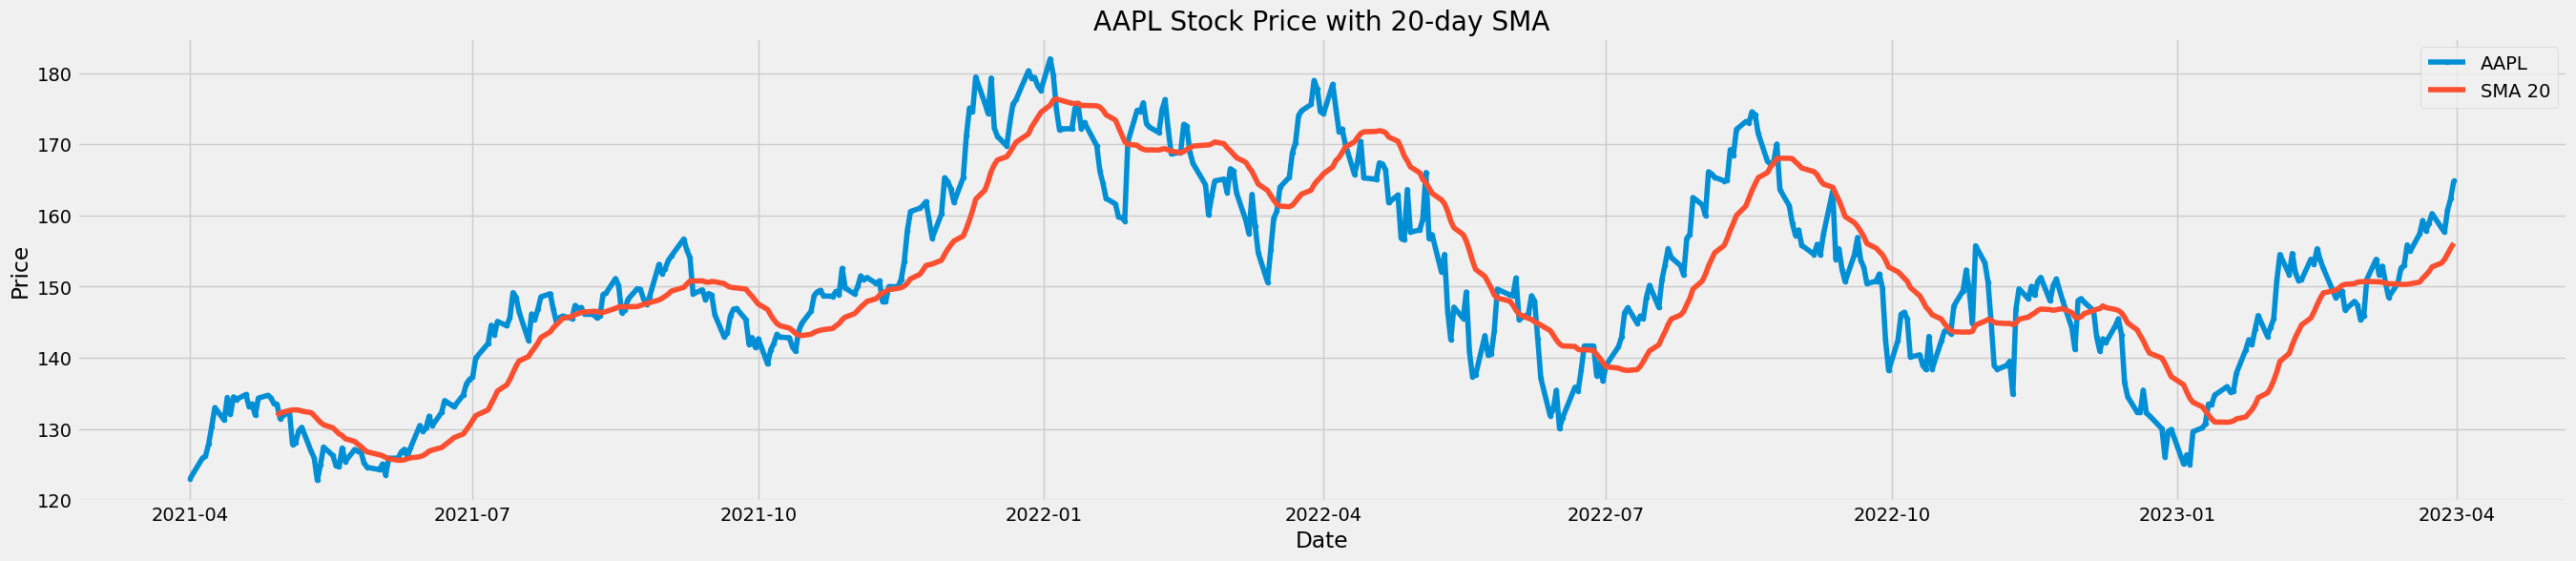

In [ ]:
plt.figure(figsize=(30,6))
plt.plot(close.index, close, label='AAPL',marker=".")
plt.plot(sma_20.index, sma_20, label='SMA 20')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AAPL Stock Price with 20-day SMA')
plt.autoscale()
plt.legend()
plt.show()


## 2- Exponential Moving Average (EMA)

Exponential Moving Average (EMA) is a type of moving average that is also widely used in technical analysis. Like SMA, EMA calculates the average price over a specified time period and displays this average as a line on a chart. However, unlike SMA, EMA gives more weight to recent prices.

EMA is calculated by taking the sum of all prices over a specified time period, but the difference is that recent prices are given more weight. This means that the most recent price has the highest weight in the calculation, while the weight of older prices gradually decreases. This is why EMA is considered to be more responsive to recent price movements than SMA.

EMA is used in the same way as SMA to determine market trends and direction. When the EMA line is trending upwards, prices are on an upward trend, and when the EMA line is trending downwards, prices are on a downward trend. The same applies to when the EMA line is moving horizontally.

EMA is a popular indicator in technical analysis because it can help traders quickly identify market trends and momentum. It can also be used in conjunction with other technical indicators to confirm trend signals. However, like all technical indicators, EMA should not be used in isolation and should be used in conjunction with other analysis techniques to make informed trading decisions.

In [ ]:
# 50 days EMA
ema_50 = close.ewm(span=50, adjust=False).mean()
# 20 days EMA
ema_20 = close.ewm(span=20, adjust=False).mean()

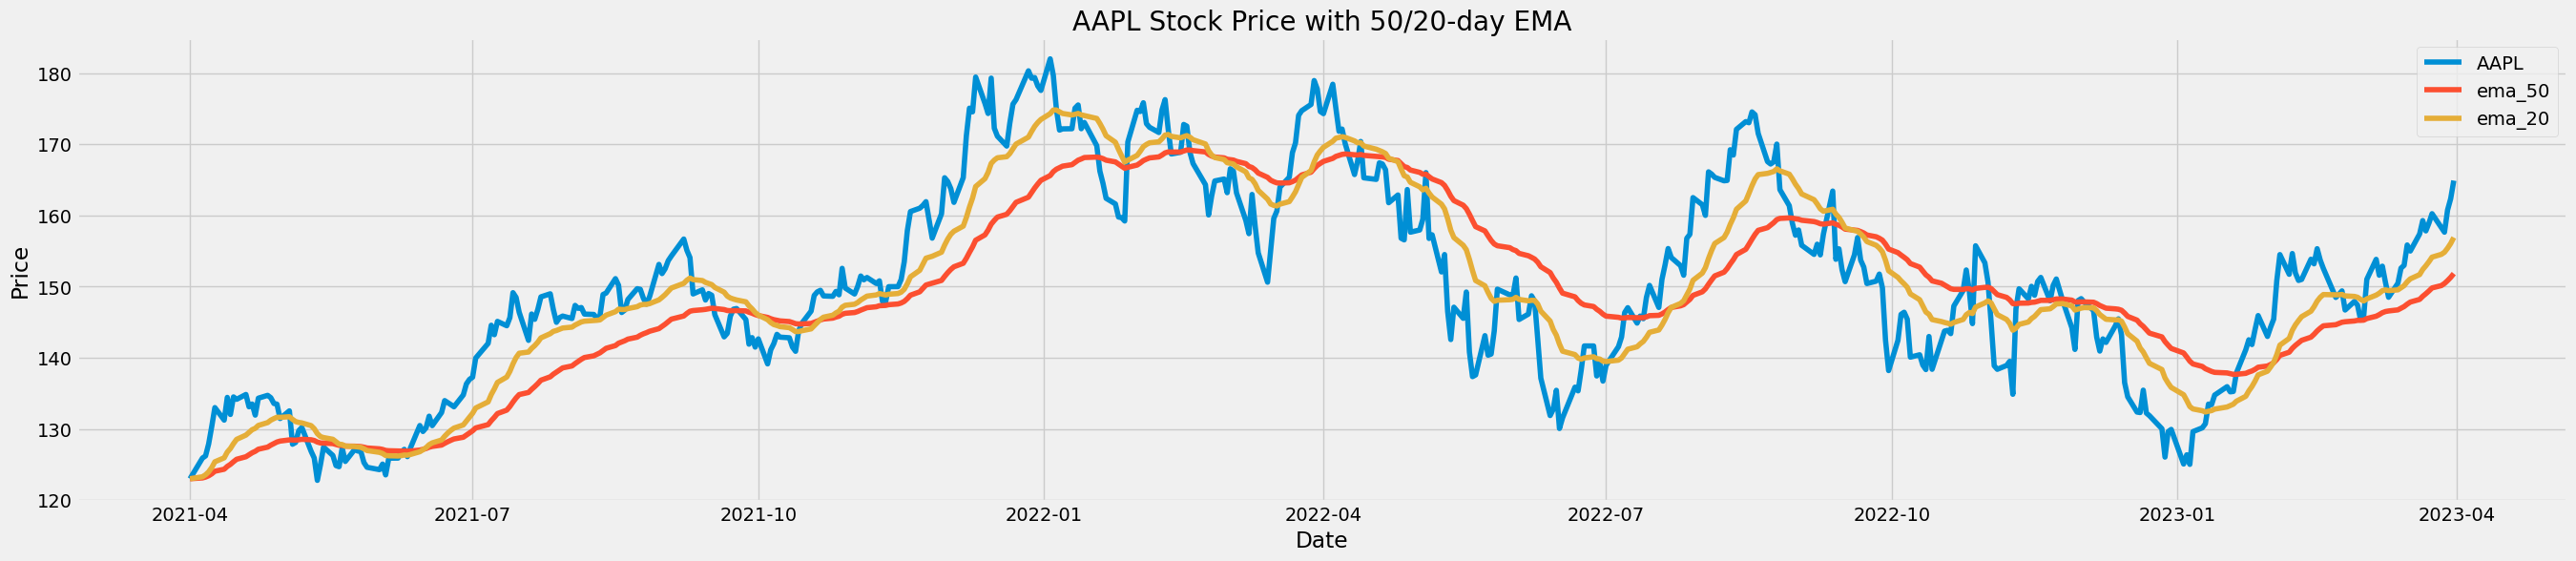

In [ ]:
plt.figure(figsize=(30,6))
plt.plot(close.index, close, label='AAPL')
plt.plot(ema_50.index, ema_50, label='ema_50')
plt.plot(ema_20.index, ema_20, label='ema_20')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AAPL Stock Price with 50/20-day EMA')
plt.autoscale()
plt.legend()
plt.show()


#3- Weighted Moving Average (WMA)

Weighted Moving Average (WMA) is a type of moving average that is commonly used in technical analysis. WMA is similar to Simple Moving Average (SMA) in that it calculates the average price over a specific time period and displays this average as a line on a chart. However, WMA gives more weight to recent prices than SMA and EMA.

WMA is calculated by multiplying each price in the specified time period by a weighting factor, and then dividing the sum of these values by the sum of the weighting factors. The weighting factor for each price is determined by its position in the time period. For example, in a 10-day WMA calculation, the most recent price would be multiplied by a weighting factor of 10, the second most recent price would be multiplied by a weighting factor of 9, and so on, until the oldest price is multiplied by a weighting factor of 1. The sum of these values is then divided by the sum of the weighting factors (which in this example would be 55).

WMA is used to determine market trends and direction in the same way as SMA and EMA. When the WMA line is trending upwards, prices are on an upward trend, and when the WMA line is trending downwards, prices are on a downward trend. The same applies to when the WMA line is moving horizontally.

In [ ]:
n = 20
weights = pd.Series(range(1, n+1))
wma_20 = close.rolling(n).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)

In [ ]:
n = 50
weights = pd.Series(range(1, n+1))
wma_50 = close.rolling(n).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)

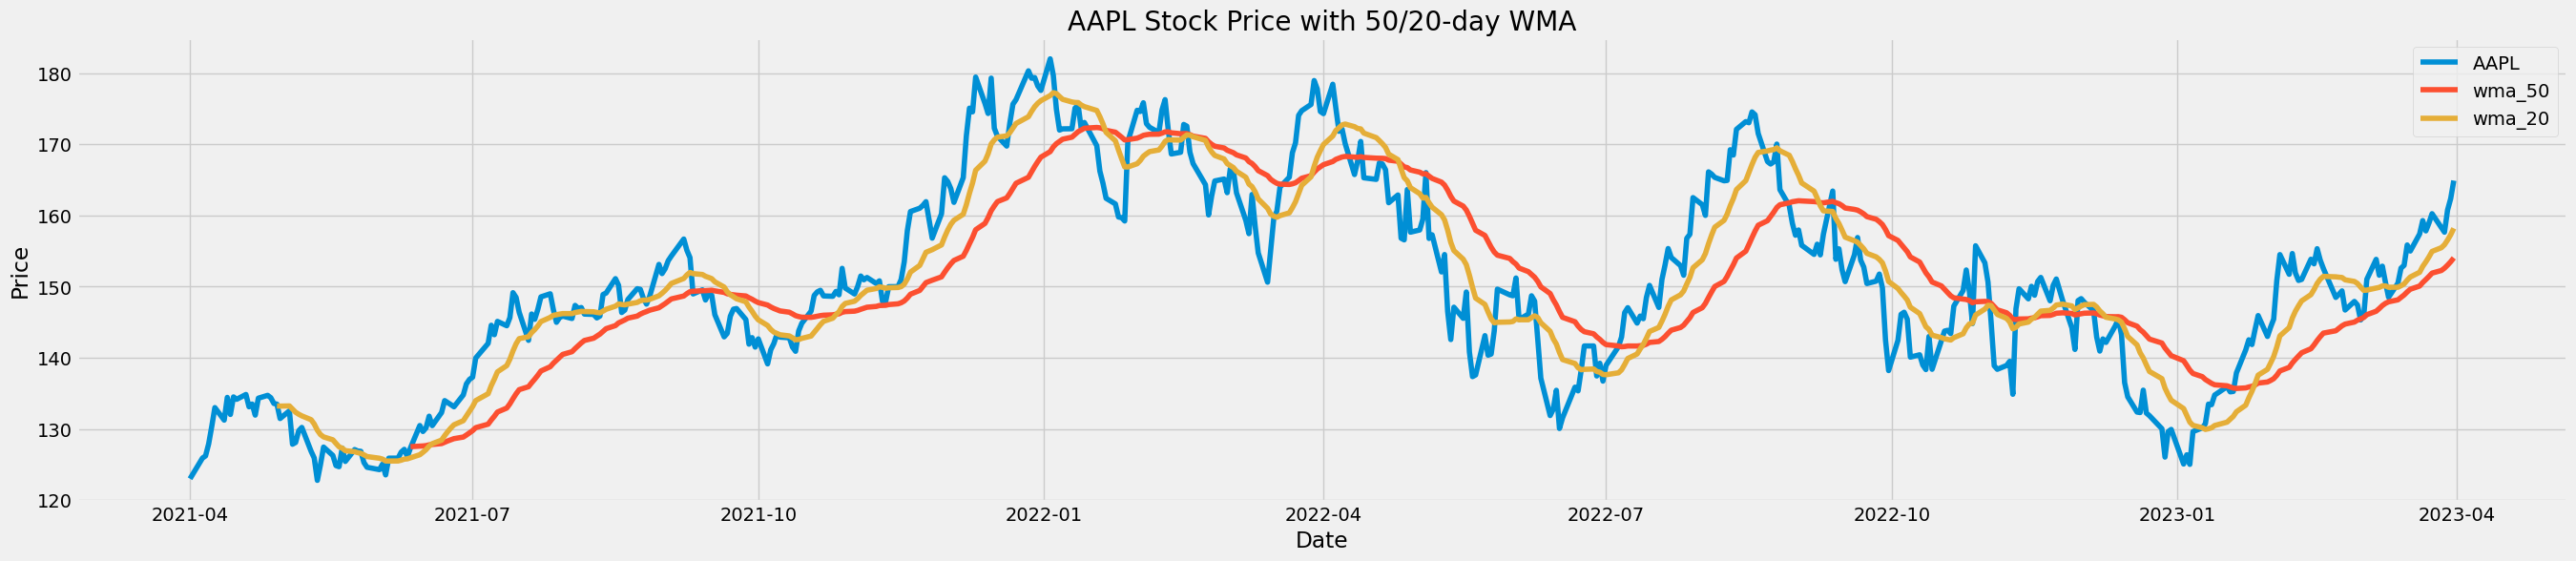

In [ ]:
plt.figure(figsize=(30,6))
plt.plot(close.index, close, label='AAPL')
plt.plot(wma_50.index, wma_50, label='wma_50')
plt.plot(wma_20.index, wma_20, label='wma_20')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AAPL Stock Price with 50/20-day WMA')
plt.autoscale()
plt.legend()
plt.show()

#4- Hull Moving Average (HMA)

The Hull Moving Average (HMA) is a technical analysis indicator that was developed by Alan Hull in 2005. It is designed to reduce the lag of traditional moving averages, while still maintaining smoothness and responsiveness to changes in price trends.

The HMA is calculated using a weighted moving average of the price, where the weightings are determined by a smoothing factor. The smoothing factor is based on the square root of the time period being used for the moving average. This means that as the time period increases, the smoothing factor decreases, making the HMA more responsive to changes in price.

To calculate the HMA, first calculate the weighted moving average of the price using the smoothing factor. Then, calculate the weighted moving average of the smoothing factor itself, using half the time period. Finally, subtract the second weighted moving average from twice the first weighted moving average to get the HMA.

The HMA is typically plotted as a line on a price chart, with traders using it to identify trends and potential reversals. When the HMA is moving upwards, it is a bullish signal, while a downwards movement indicates bearishness. Traders often use the HMA in conjunction with other indicators and technical analysis tools to confirm signals and improve their trading decisions.

Overall, the Hull Moving Average is a popular and effective tool for traders who are looking for a smoother, more responsive moving average that can help them identify market trends and make better trading decisions.

In [ ]:
n1 = 20
n2 = 5
wma1 = close.rolling(n1).apply(lambda prices: np.dot(prices, np.arange(1, n1+1))/np.arange(1, n1+1).sum(), raw=True)
wma2 = close.rolling(n2).apply(lambda prices: np.dot(prices, np.arange(1, n2+1))/np.arange(1, n2+1).sum(), raw=True)
sqrt_n1 = int(np.sqrt(n1))
hma_20 = wma1.rolling(sqrt_n1).mean()
sqrt_n2 = int(np.sqrt(n2))
hma_5 = wma2.rolling(sqrt_n2).mean()

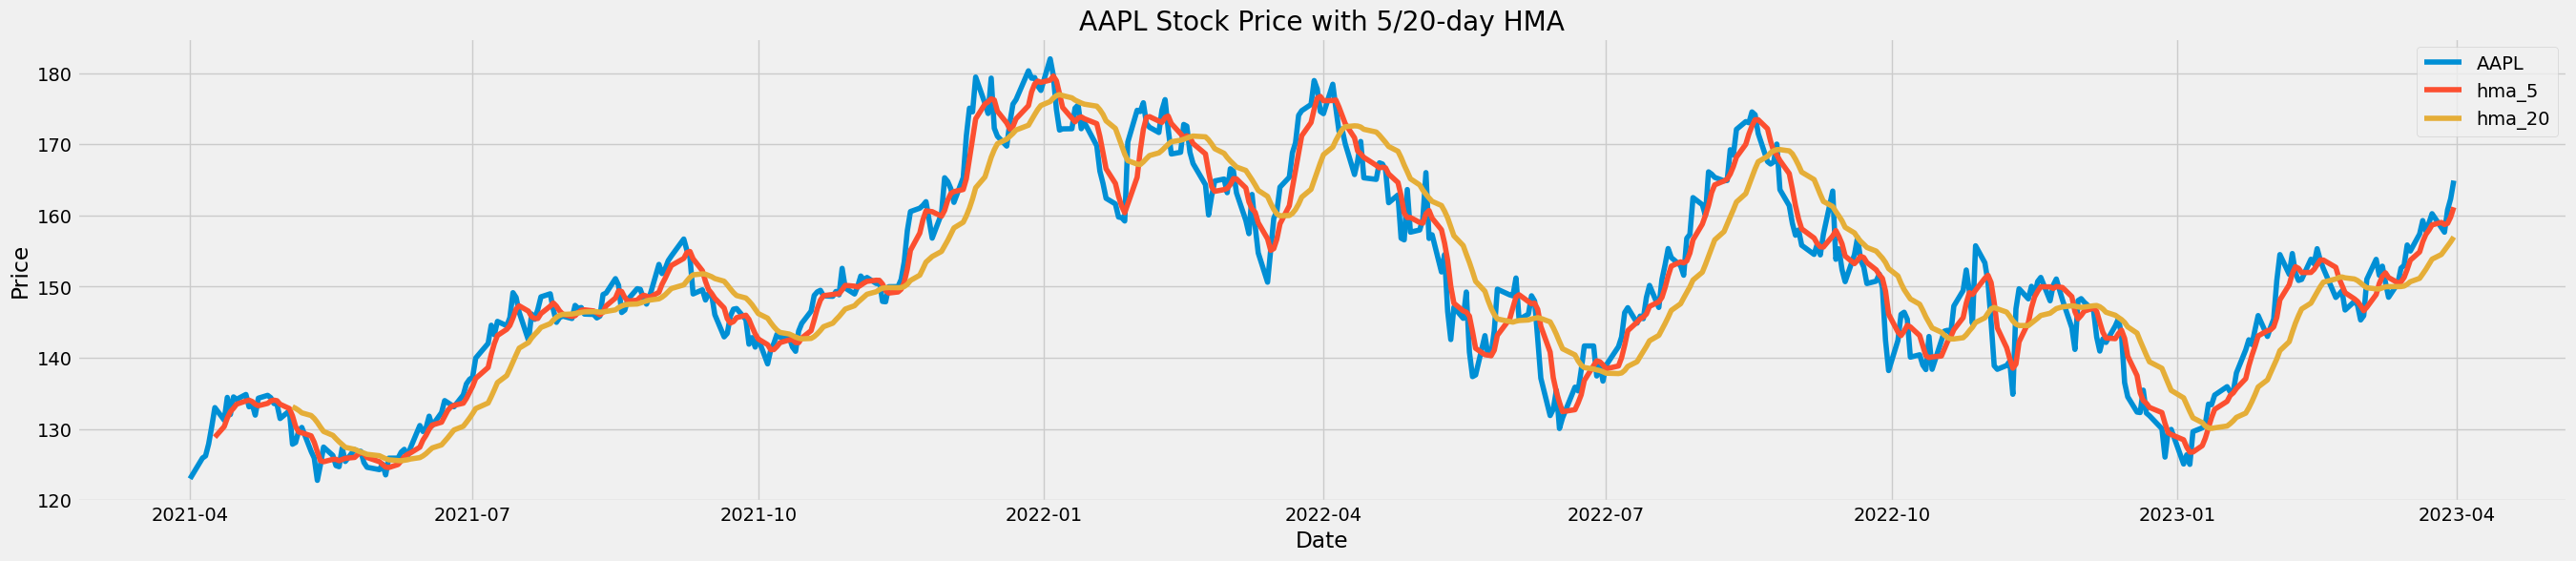

In [ ]:
plt.figure(figsize=(30,6))
plt.plot(close.index, close, label='AAPL')
plt.plot(hma_5.index, hma_5, label='hma_5')
plt.plot(hma_20.index, hma_20, label='hma_20')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AAPL Stock Price with 5/20-day HMA')
plt.autoscale()
plt.legend()
plt.show()

#5- Triangular Moving Average (TMA)




The Triangular Moving Average (TMA) is a technical analysis indicator that is used to smooth out price fluctuations and provide a clearer view of the underlying trend. It is similar to other types of moving averages, such as the simple moving average (SMA) and exponential moving average (EMA), but it places more weight on recent price data.

The TMA is calculated by taking the average of the price over a specified time period, and then smoothing that value with a second moving average. The second moving average is then smoothed again with a third moving average, which results in a triangular shape for the moving average line.

The TMA is designed to reduce the lag of traditional moving averages, making it more responsive to changes in the market. It is also less susceptible to whipsaws, where the price briefly moves in one direction before quickly reversing, as the triangular shape smooths out the fluctuations in the price.

Traders use the TMA in a variety of ways, such as to identify trends, spot potential support and resistance levels, and generate buy and sell signals. When the TMA is moving upwards, it is a bullish signal, while a downwards movement indicates bearishness.

It's worth noting that the TMA is a lagging indicator, meaning it is based on past price data and does not predict future price movements. As with any technical indicator, it is best used in conjunction with other analysis tools and trading strategies to confirm signals and improve overall trading decisions.

Overall, the Triangular Moving Average is a popular and effective tool for traders who are looking for a smoother, more responsive moving average that can help them identify market trends and make better trading decisions.

In [ ]:
def tma(data, period):
    return data.rolling(period).mean().rolling(period).mean()

tma5 = tma(close, 5)
tma20 = tma(close, 20)

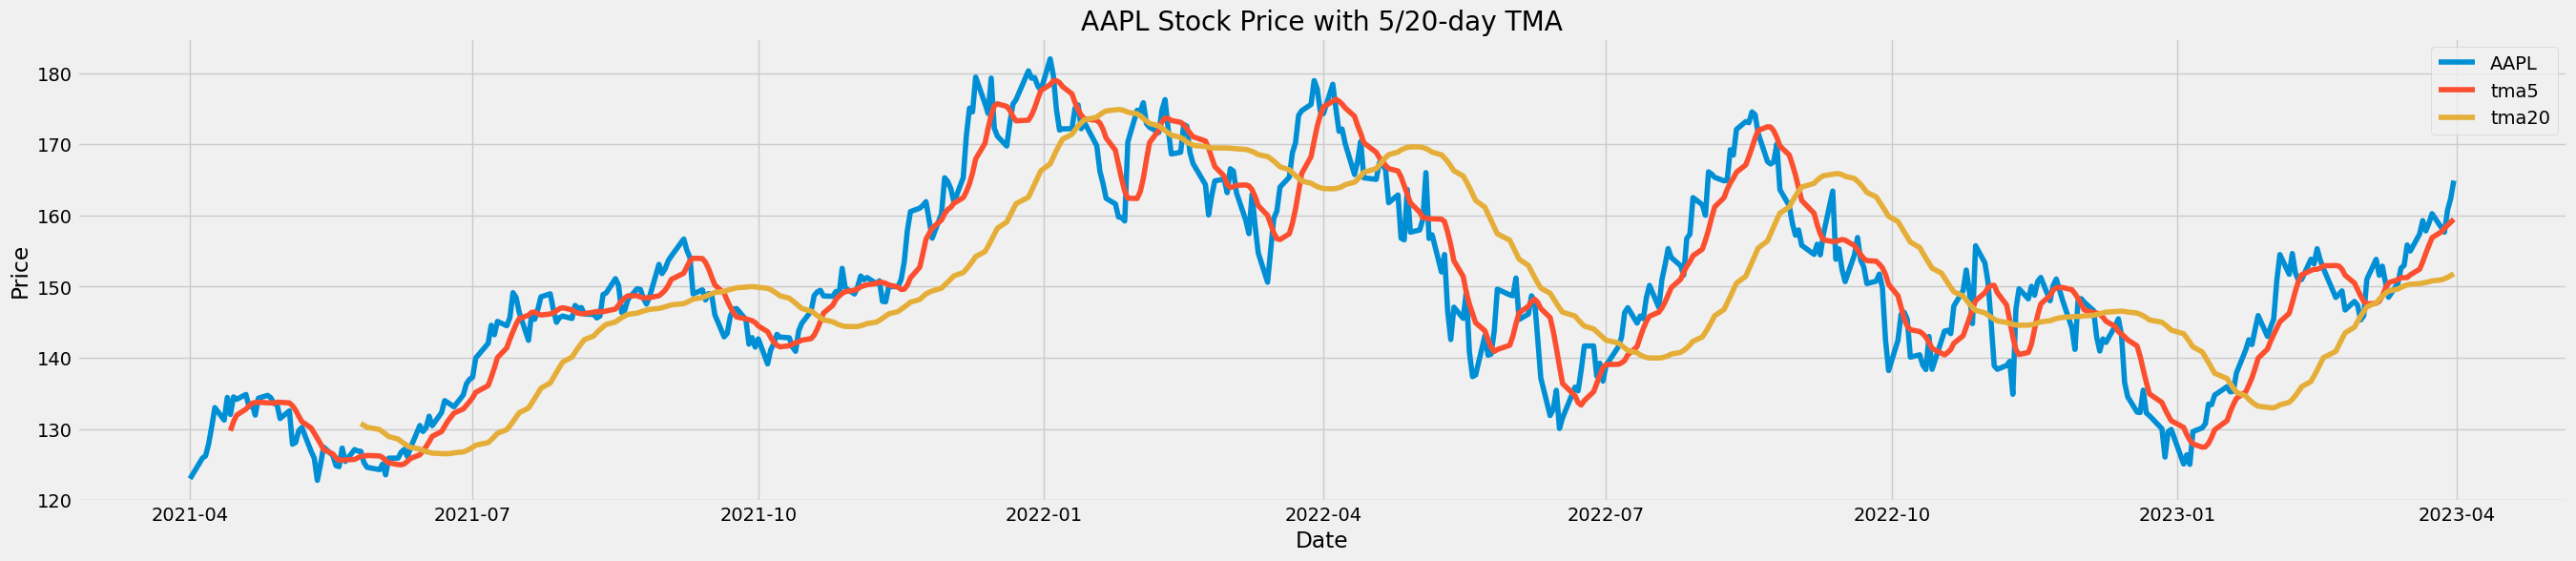

In [ ]:
plt.figure(figsize=(30,6))
plt.plot(close.index, close, label='AAPL')
plt.plot(tma5.index, tma5, label='tma5')
plt.plot(tma20.index, tma20, label='tma20')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AAPL Stock Price with 5/20-day TMA')
plt.autoscale()
plt.legend()

plt.show()

# 6-Kaufman Adaptive Moving Average (KAMA)

The Kaufman Adaptive Moving Average (KAMA) is a technical analysis indicator that is similar to the Adaptive Moving Average (AMA), but it includes an additional smoothing factor that is designed to further reduce false signals and provide a clearer view of the underlying trend. The KAMA was developed by Perry Kaufman in 1998 and is widely used by traders and analysts.

The KAMA is calculated using a combination of exponential and linear regression methods, similar to the AMA. However, the KAMA also includes an additional smoothing factor that adjusts the speed of the moving average based on the proximity of the price to the current KAMA value. When the price is far away from the KAMA, the smoothing factor is increased to provide a slower moving average. When the price is closer to the KAMA, the smoothing factor is reduced to provide a faster moving average.

The KAMA is designed to reduce whipsaws and false signals by adjusting the smoothing factor based on the current market conditions. It is also responsive to changes in volatility, which can help traders identify trends and potential reversals.

Traders use the KAMA in a variety of ways, such as to identify trends, spot potential support and resistance levels, and generate buy and sell signals. When the KAMA is moving upwards, it is a bullish signal, while a downwards movement indicates bearishness.

Like any technical indicator, the KAMA should not be used in isolation to make trading decisions. It is best used in conjunction with other technical analysis tools and trading strategies to confirm signals and improve overall trading decisions.

Overall, the Kaufman Adaptive Moving Average is a powerful tool for traders who are looking for a more responsive and accurate moving average that can help them identify market trends and make better trading decisions.

In [ ]:
import pandas as pd
import numpy as np

class KAMA():
    def __init__(self, data, n1=10, n2=2, n3=30):
        self.n1 = n1
        self.n2 = n2
        self.n3 = n3
        self.data = data
        self.er = pd.Series(abs(self.data - self.data.shift(self.n1)))
        self.sr = pd.Series(abs(self.data - self.data.shift(1)).rolling(self.n1).sum())
        self.sc = ((self.er/self.sr) * (2/(self.n2+1) - 2/(self.n3+1)) + 2/(self.n3+1))**2
        
    def kama(self):
        out = np.zeros(len(self.data))
        for i in range(len(out)):
            if i < self.n1:
                out[i] = self.data[i]
            else:
                out[i] = out[i-1] + self.sc[i] * (self.data[i] - out[i-1])
        return out


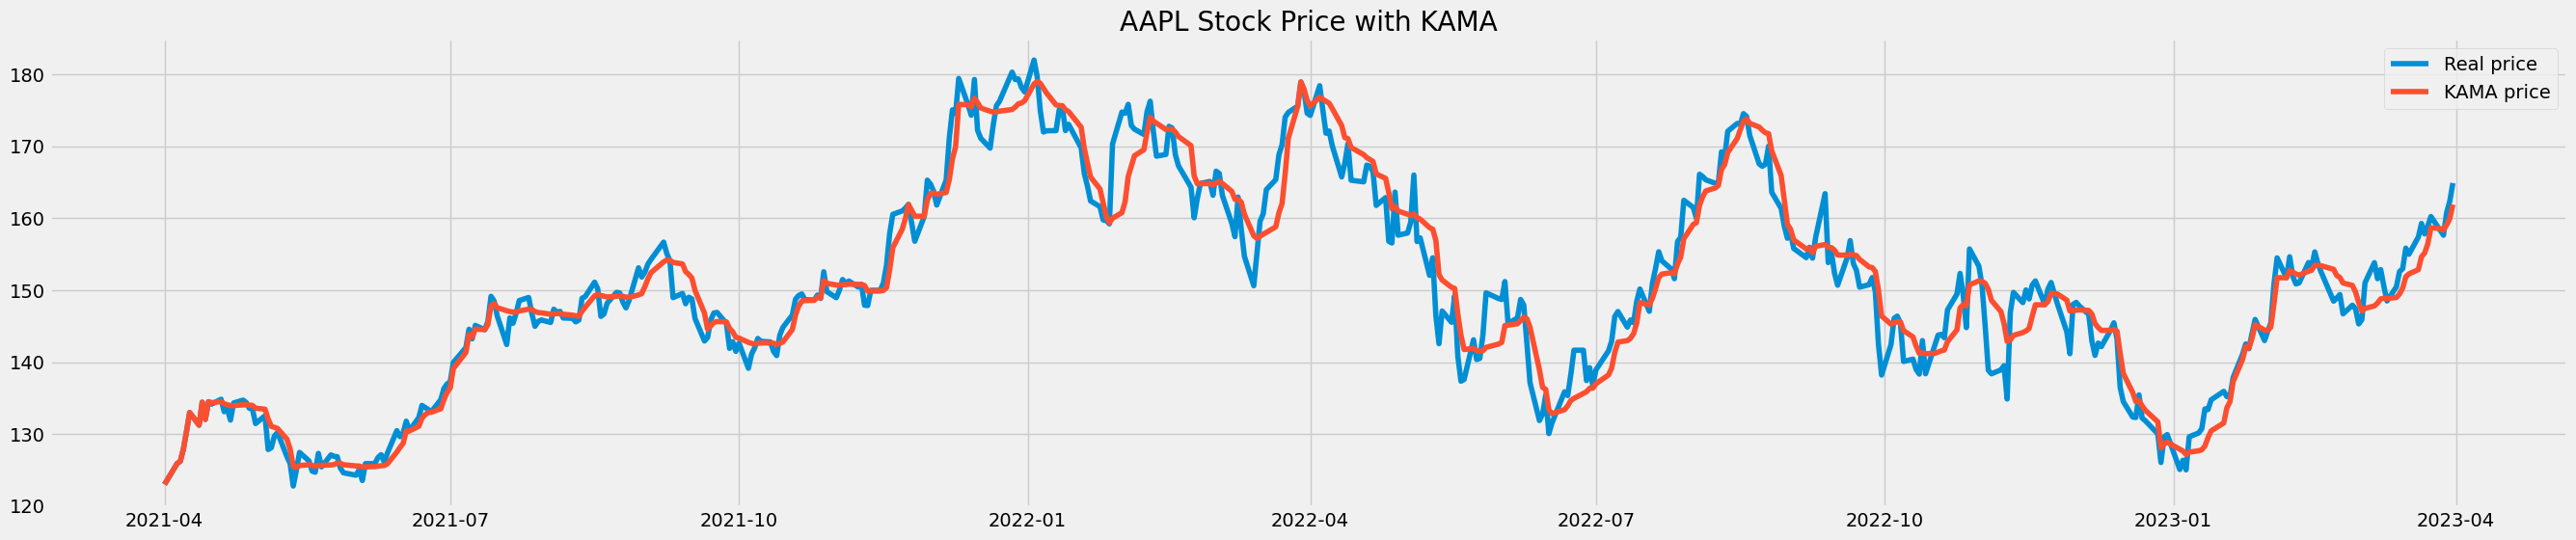

In [ ]:
kama = KAMA(close, 10, 1, 10)
predictions = kama.kama()
plt.figure(figsize=(30,6))
plt.plot(close.index, close.values, label='Real price')
plt.plot(close.index, predictions, label='KAMA price')
plt.title('AAPL Stock Price with KAMA')
plt.legend()
plt.show()

#7- Volume Weighted Moving Average (VWMA)

The Volume Weighted Moving Average (VWMA) is a technical analysis indicator that is similar to other types of moving averages, but it places more weight on periods of high trading volume. The VWMA was developed to provide a more accurate view of the underlying trend by taking into account both price and volume data.

The VWMA is calculated by multiplying each price point by the volume traded at that price, and then dividing the total by the total volume over a specified time period. This results in a moving average that is weighted by the volume traded at each price point, with periods of high volume having a greater impact on the overall average.

The VWMA is designed to provide a more accurate view of the underlying trend by placing more weight on periods of high trading volume. This can help traders identify potential support and resistance levels, as well as confirm trends and potential trend reversals.

Traders use the VWMA in a variety of ways, such as to identify trends, spot potential support and resistance levels, and generate buy and sell signals. When the VWMA is moving upwards, it is a bullish signal, while a downwards movement indicates bearishness.

Like any technical indicator, the VWMA should not be used in isolation to make trading decisions. It is best used in conjunction with other technical analysis tools and trading strategies to confirm signals and improve overall trading decisions.

Overall, the Volume Weighted Moving Average is a powerful tool for traders who are looking for a more accurate moving average that takes into account both price and volume data. It can help traders identify potential trends and market conditions, and make better trading decisions based on a more complete picture of the market.

In [ ]:
def VWMA(data, window):
    volume = data['Volume']
    close = data['Close']
    return (close * volume).rolling(window=window).sum() / volume.rolling(window=window).sum()

vma_10 = VWMA(aapl, 10)
vma_30 = VWMA(aapl, 30)

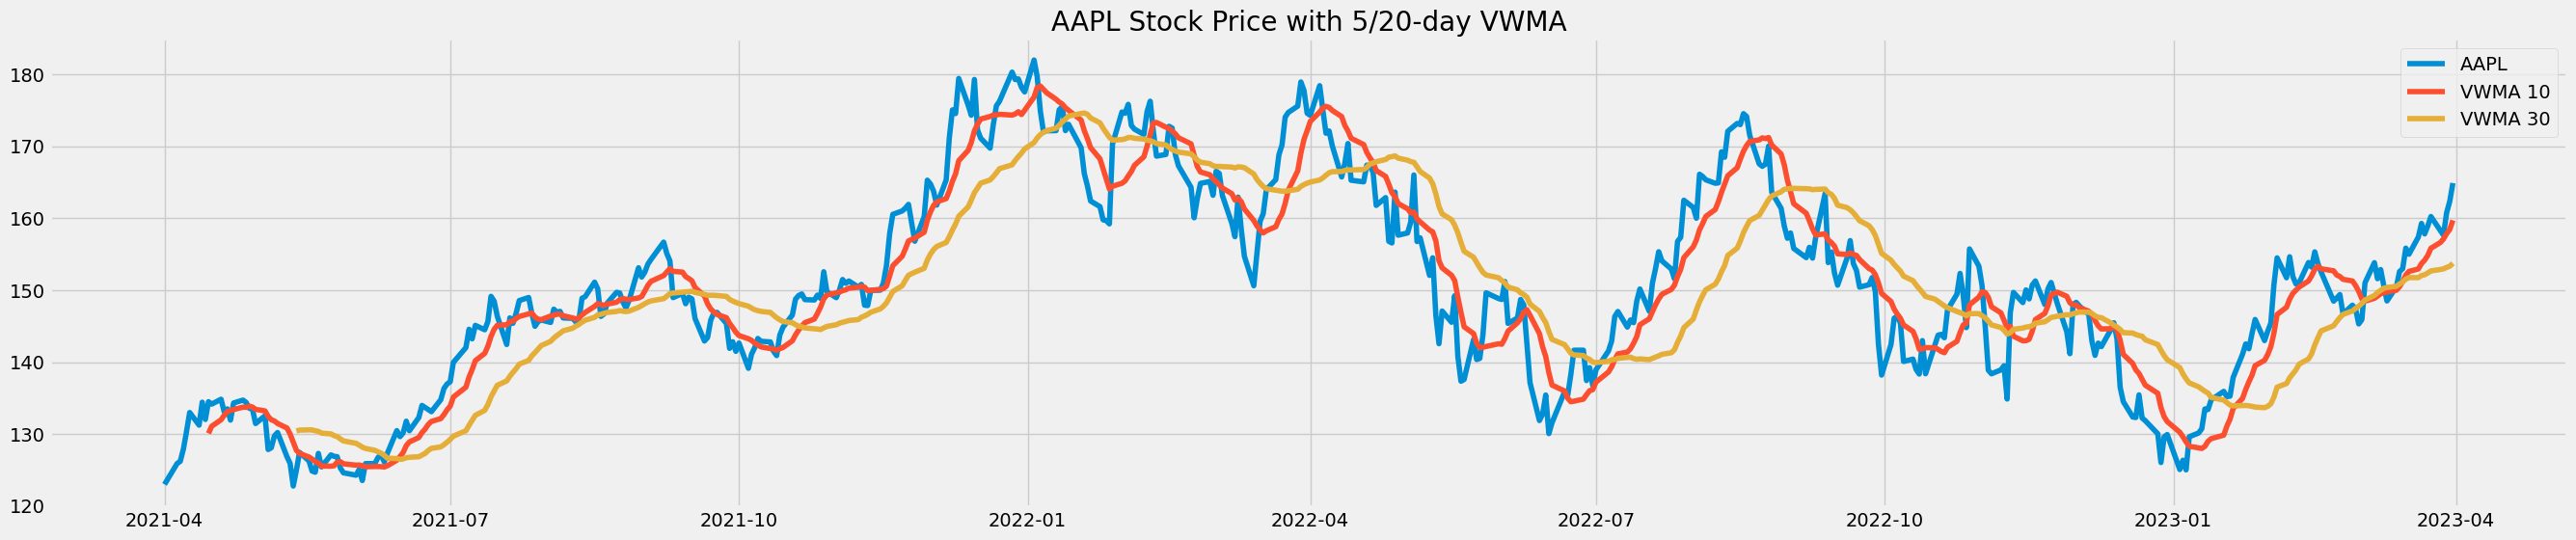

In [ ]:
plt.figure(figsize=(30,6))
plt.plot(aapl['Close'], label='AAPL')
plt.plot(vma_10, label='VWMA 10')
plt.plot(vma_30, label='VWMA 30')
plt.legend()
plt.title('AAPL Stock Price with 5/20-day VWMA')
plt.show()

# 8-Moving Average Ribbon(MAR)

The Moving Average Ribbon (MAR) is a technical analysis indicator that is composed of multiple moving averages of different time periods, stacked on top of each other. The MAR is designed to provide a more complete view of the underlying trend by displaying multiple moving averages at once.

The MAR is calculated by taking a series of moving averages, such as the 10-day, 20-day, and 50-day moving averages, and stacking them on top of each other on a price chart. The result is a ribbon-like pattern that shows multiple moving averages of different time periods.

The MAR is designed to provide a more complete view of the underlying trend by displaying multiple moving averages at once. This can help traders identify potential support and resistance levels, as well as confirm trends and potential trend reversals.

Traders use the MAR in a variety of ways, such as to identify trends, spot potential support and resistance levels, and generate buy and sell signals. When the moving averages are moving upwards and the ribbon is widening, it is a bullish signal, while a downwards movement and narrowing ribbon indicate bearishness.

Like any technical indicator, the MAR should not be used in isolation to make trading decisions. It is best used in conjunction with other technical analysis tools and trading strategies to confirm signals and improve overall trading decisions.

Overall, the Moving Average Ribbon is a powerful tool for traders who are looking for a more complete view of the underlying trend. It can help traders identify potential trends and market conditions, and make better trading decisions based on a more complete picture of the market.

In [ ]:
def moving_average_ribbon(data, windows):
    ma_list = []
    for w in windows:
        ma = data['Close'].rolling(window=w).mean()
        ma_list.append(ma)
    return ma_list


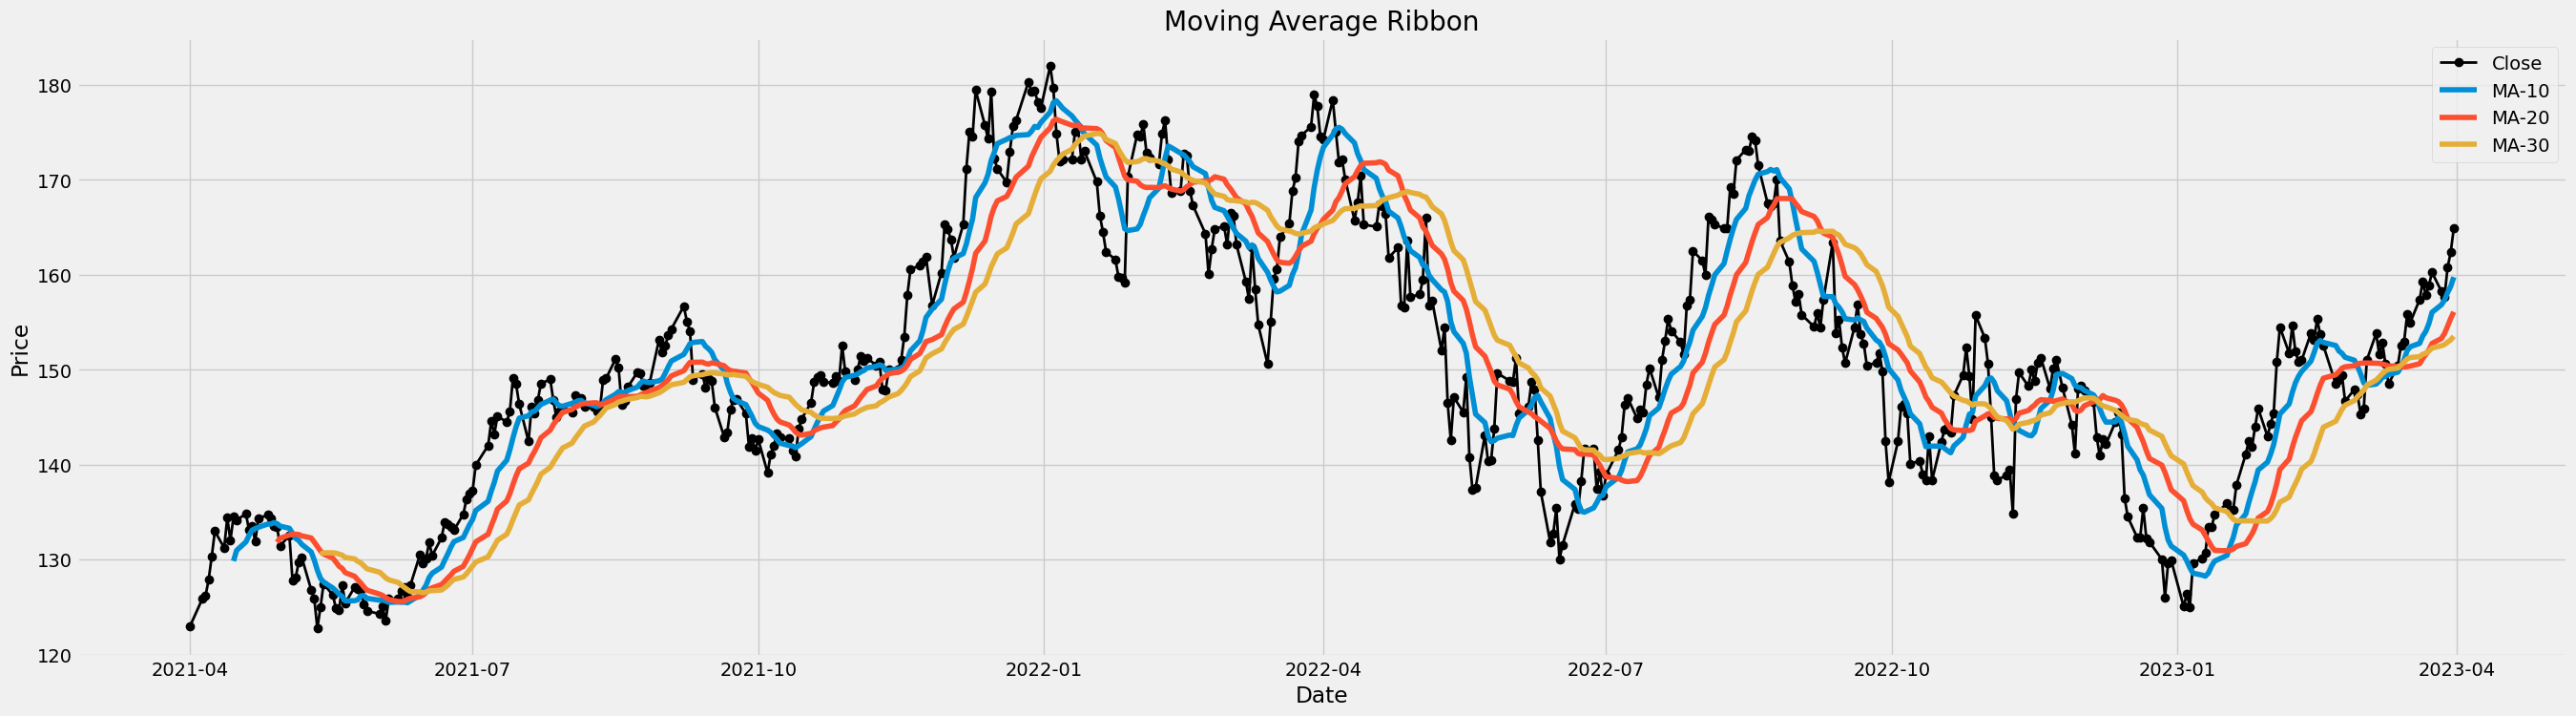

In [ ]:
windows = [10, 20, 30]
ma_list = moving_average_ribbon(aapl, windows)

fig, ax = plt.subplots(figsize=(30,8))

for i, ma in enumerate(ma_list):
    if i == 0:
        ax.plot(aapl.index, aapl['Close'], linewidth=2, color='black', label='Close',marker="o")
    ax.plot(ma, label=f'MA-{windows[i]}')
ax.legend()
ax.set_title('Moving Average Ribbon')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.show()


# 9-Moving Average Envelope (MAE)

The Moving Average Envelope (MAE) is a technical analysis indicator that is composed of two moving averages of different time periods, plotted above and below the price chart at a fixed percentage distance from the moving averages. The MAE is designed to provide a visual representation of potential support and resistance levels based on the moving averages.

The MAE is calculated by taking two moving averages, such as the 10-day and 20-day moving averages, and plotting them on a price chart at a fixed percentage distance from the moving averages. The resulting envelopes or bands above and below the price chart provide potential support and resistance levels.

Traders use the MAE in a variety of ways, such as to identify potential support and resistance levels, spot trends, and generate buy and sell signals. When the price is trading above the upper band, it is considered overbought and a potential sell signal. When the price is trading below the lower band, it is considered oversold and a potential buy signal.

Like any technical indicator, the MAE should not be used in isolation to make trading decisions. It is best used in conjunction with other technical analysis tools and trading strategies to confirm signals and improve overall trading decisions.

Overall, the Moving Average Envelope is a powerful tool for traders who are looking for a visual representation of potential support and resistance levels based on moving averages. It can help traders identify potential trends and market conditions, and make better trading decisions based on a more complete picture of the market

In [ ]:
sma = close.rolling(window=20).mean()

upper_band = sma * 1.10
lower_band = sma * 0.90

mae = pd.concat([close, sma, upper_band, lower_band], axis=1)
mae.columns = ['Close', 'SMA', 'Upper Band', 'Lower Band']

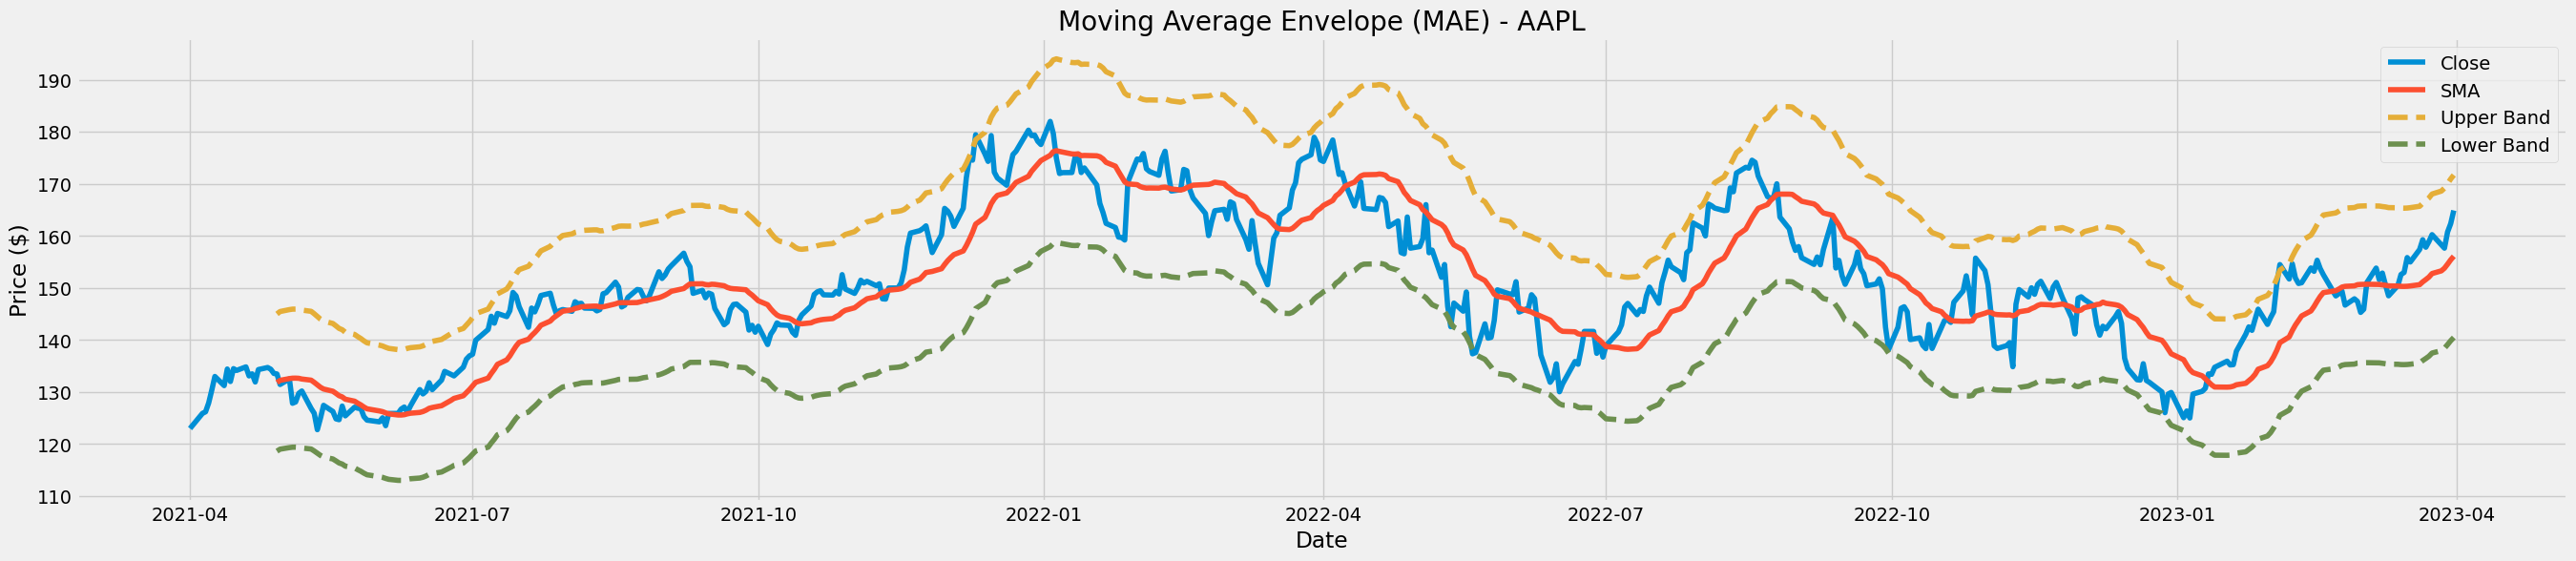

In [ ]:
# MAE'yi görselleştir
fig, ax = plt.subplots(figsize=(30,6))

ax.plot(mae.index, mae['Close'], label='Close')
ax.plot(mae.index, mae['SMA'], label='SMA')
ax.plot(mae.index, mae['Upper Band'], label='Upper Band', linestyle='--')
ax.plot(mae.index, mae['Lower Band'], label='Lower Band', linestyle='--')
ax.set_title('Moving Average Envelope (MAE) - AAPL')
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.legend()
plt.show()

#10- Moving Average Convergence Divergence (MACD)

Moving Average Convergence Divergence (MACD) is a popular technical analysis indicator used to identify trends and momentum in financial markets. It is calculated by subtracting a longer-term exponential moving average (EMA) from a shorter-term EMA, with the difference plotted as a histogram and a signal line overlaying the histogram.

The MACD indicator consists of three main components:

    The MACD line, which is the difference between the 12-period EMA and the 26-period EMA.

    The signal line, which is the 9-period EMA of the MACD line.

    The MACD histogram, which represents the difference between the MACD line and the signal line, plotted as a series of bars.

Traders use the MACD indicator to identify potential buy and sell signals. When the MACD line crosses above the signal line, it is considered a bullish signal, indicating that the trend may be shifting upwards. Conversely, when the MACD line crosses below the signal line, it is considered a bearish signal, indicating that the trend may be shifting downwards.

In addition to identifying potential buy and sell signals, the MACD histogram can also be used to identify divergences between price and momentum. A bullish divergence occurs when the price is making lower lows but the MACD histogram is making higher lows, indicating that momentum is shifting upwards. A bearish divergence occurs when the price is making higher highs but the MACD histogram is making lower highs, indicating that momentum is shifting downwards.

Overall, the MACD indicator is a powerful tool for traders who are looking to identify trends and momentum in financial markets. However, like any technical indicator, it should not be used in isolation and should be used in conjunction with other technical analysis tools and trading strategies to confirm signals and improve overall trading decisions.

In [ ]:
ema12 = close.ewm(span=12, adjust=False).mean()
ema26 = close.ewm(span=26, adjust=False).mean()

macd = ema12 - ema26

signal = macd.ewm(span=9, adjust=False).mean()

hist = macd - signal

macd_df = pd.concat([macd, signal, hist], axis=1)
macd_df.columns = ['MACD', 'Signal Line', 'Histogram']

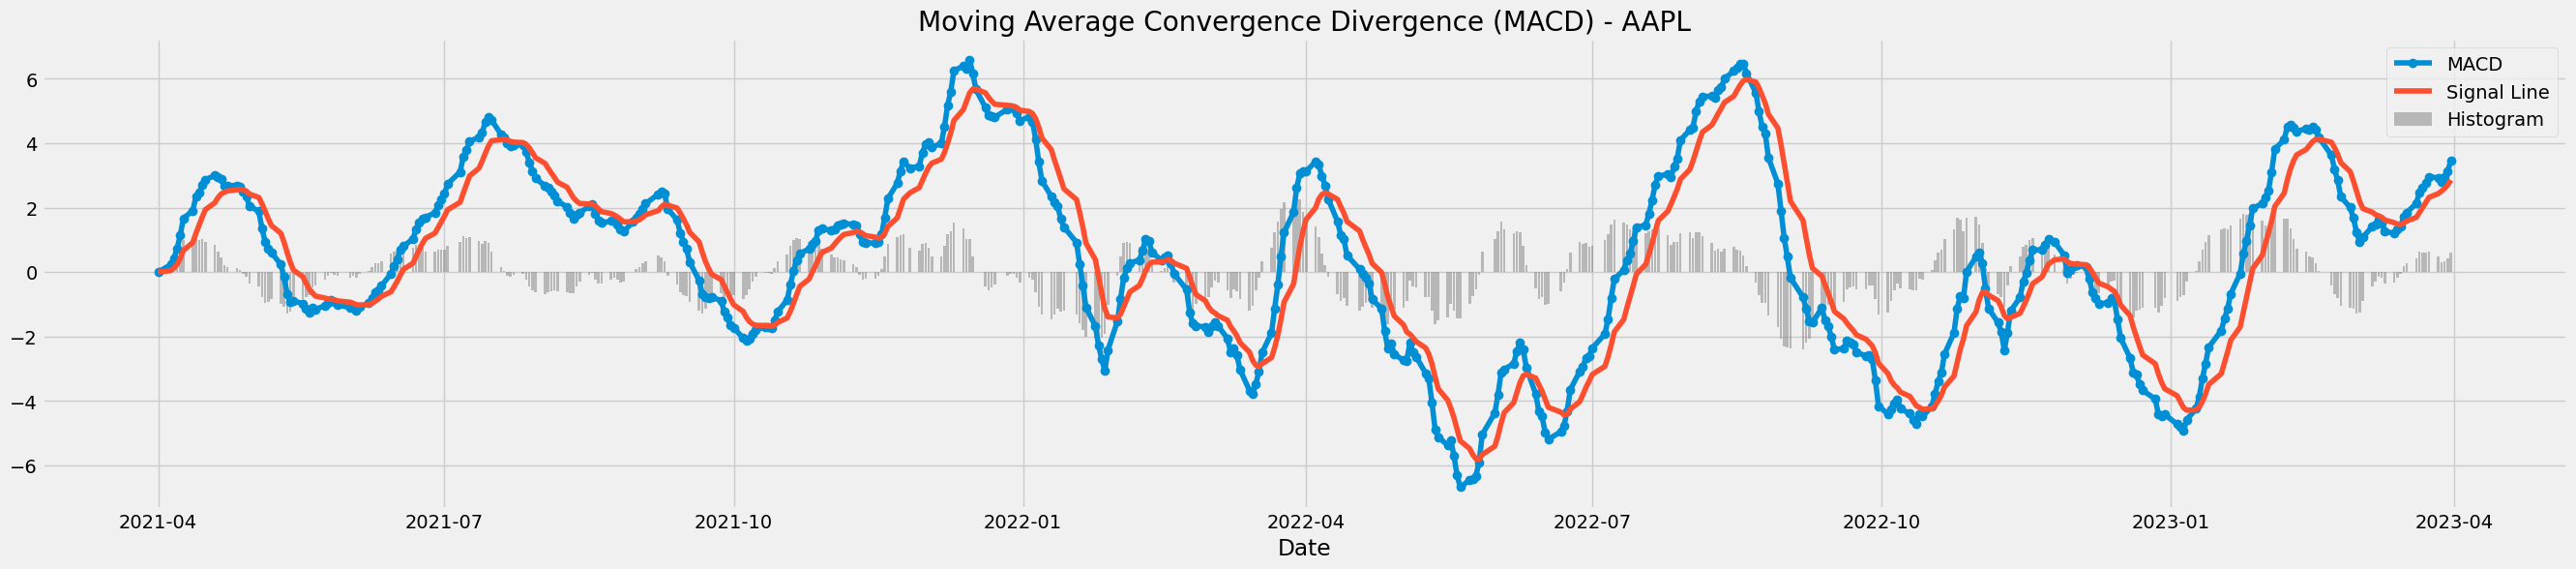

In [ ]:
fig, ax = plt.subplots(figsize=(30,6))
ax.plot(macd_df.index, macd_df['MACD'], label='MACD',marker="o")
ax.plot(macd_df.index, macd_df['Signal Line'], label='Signal Line')
ax.bar(macd_df.index, macd_df['Histogram'], label='Histogram', color='gray', alpha=0.5)
ax.set_title('Moving Average Convergence Divergence (MACD) - AAPL')
ax.set_xlabel('Date')
ax.legend()
plt.show()

##11- Moving Average Slope (MAS)

Moving Average Slope (MAS) is a technical analysis indicator used to identify the slope or direction of a moving average. It is calculated by measuring the difference between the current value of a moving average and the value of the moving average n periods ago, divided by the number of periods.

The MAS indicator can be applied to any type of moving average, such as the simple moving average (SMA), exponential moving average (EMA), or weighted moving average (WMA). It is typically plotted as a line on a chart, with positive values indicating an upward slope and negative values indicating a downward slope.

Traders use the MAS indicator to identify potential buy and sell signals based on the slope of the moving average. When the MAS is positive, it indicates that the moving average is sloping upwards, which is considered a bullish signal. Conversely, when the MAS is negative, it indicates that the moving average is sloping downwards, which is considered a bearish signal.

In addition to identifying potential buy and sell signals, the MAS indicator can also be used to confirm trends and identify potential trend reversals. When the MAS changes from positive to negative, it indicates a potential shift from a bullish trend to a bearish trend. Conversely, when the MAS changes from negative to positive, it indicates a potential shift from a bearish trend to a bullish trend.

Overall, the Moving Average Slope indicator is a useful tool for traders who are looking to identify the direction and slope of a moving average. However, like any technical indicator, it should not be used in isolation and should be used in conjunction with other technical analysis tools and trading strategies to confirm signals and improve overall trading decisions.

In [ ]:
def calculate_mas(close, window=20):
    sma = close.rolling(window=window).mean()
    mas = np.polyfit(np.arange(len(sma)), sma, 1)[0]
    return mas

aapl['MAS 20'] = aapl['Close'].rolling(window=20).mean()

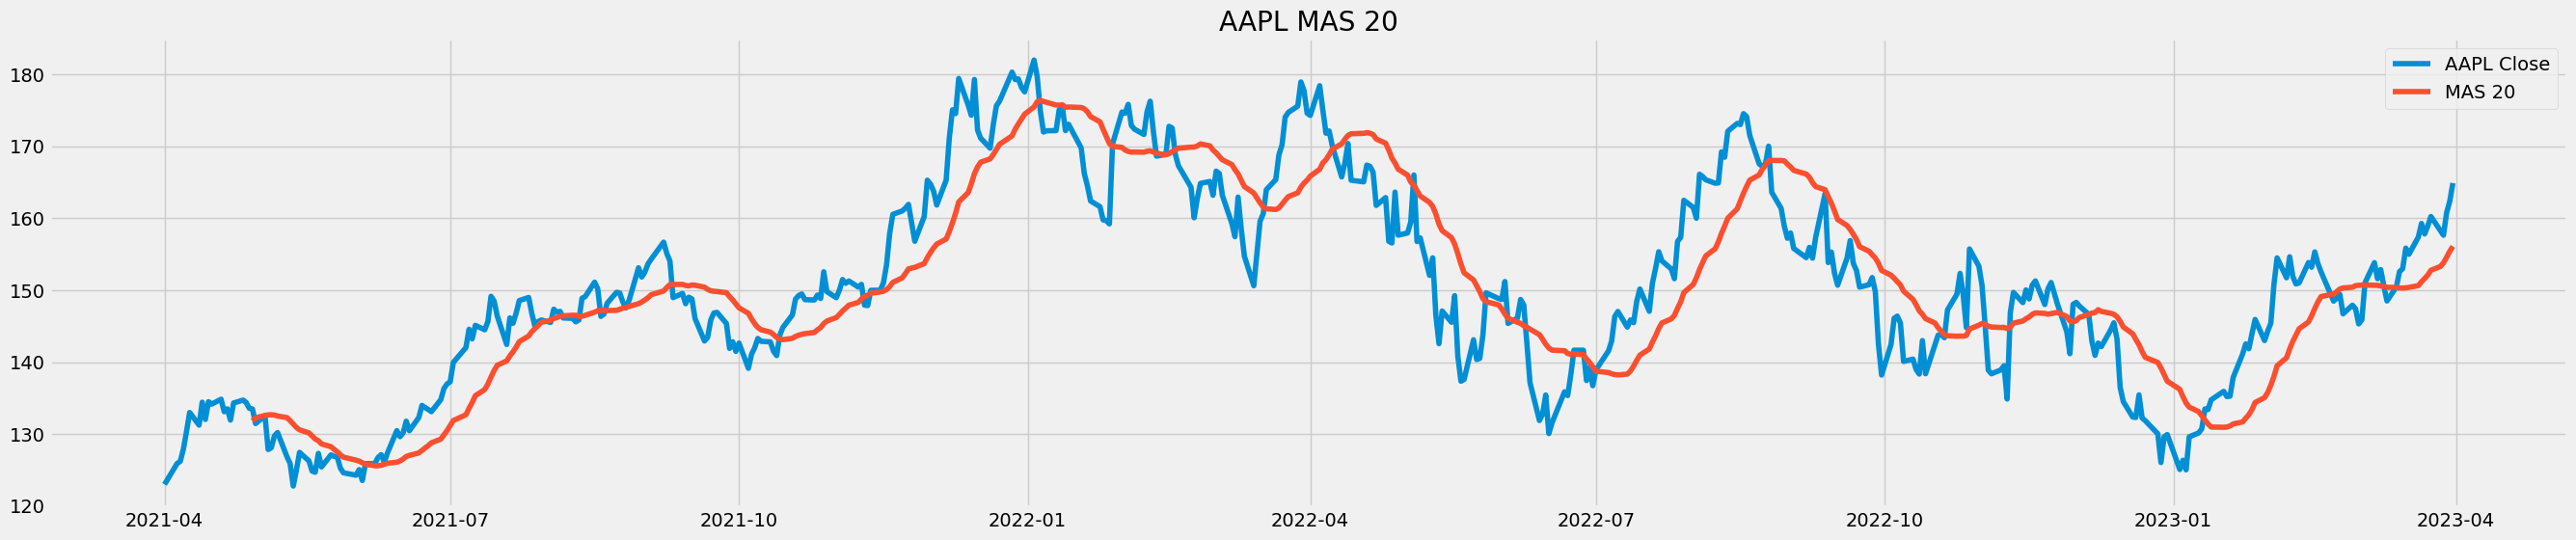

In [ ]:
plt.figure(figsize=(30,6))
plt.plot(aapl['Close'], label='AAPL Close')
plt.plot(aapl['MAS 20'], label='MAS 20')
plt.legend()
plt.title('AAPL MAS 20')
plt.show()

# 12-Moving Average Angle (MAA)

Moving Average Angle (MAA) is a technical analysis indicator used to measure the angle or slope of a moving average. It is calculated by measuring the angle between two points on the moving average, typically the current point and a point n periods ago.

The MAA indicator can be applied to any type of moving average, such as the simple moving average (SMA), exponential moving average (EMA), or weighted moving average (WMA). It is typically plotted as a line on a chart, with the angle of the line indicating the slope of the moving average.

Traders use the MAA indicator to identify potential buy and sell signals based on the angle of the moving average. When the MAA is steeply sloped upwards, it indicates a strong bullish trend, while a steeply sloped downwards MAA indicates a strong bearish trend. A flat MAA indicates a market in consolidation or trading range.

In addition to identifying potential buy and sell signals, the MAA indicator can also be used to confirm trends and identify potential trend reversals. When the angle of the MAA changes from upwards to downwards, it indicates a potential shift from a bullish trend to a bearish trend. Conversely, when the angle of the MAA changes from downwards to upwards, it indicates a potential shift from a bearish trend to a bullish trend.

Overall, the Moving Average Angle indicator is a useful tool for traders who are looking to identify the direction and slope of a moving average. However, like any technical indicator, it should not be used in isolation and should be used in conjunction with other technical analysis tools and trading strategies to confirm signals and improve overall trading decisions.

In [ ]:
aapl['MA20'] = aapl['Adj Close'].rolling(window=20).mean()

aapl['PriceDelta'] = aapl['Adj Close'].diff()

aapl['PriceDeltaAbs'] = aapl['PriceDelta'].abs()

aapl['MADelta'] = aapl['PriceDeltaAbs'].rolling(window=20).mean()

aapl['MADeltaSTD'] = aapl['PriceDeltaAbs'].rolling(window=20).std()

aapl['Trend'] = np.where(aapl['PriceDelta'] > aapl['MADelta'] + 2*aapl['MADeltaSTD'], 1, np.where(aapl['PriceDelta'] < -aapl['MADelta'] - 2*aapl['MADeltaSTD'], -1, 0))

aapl['Angle'] = np.degrees(np.arctan(aapl['MA20'].diff()))

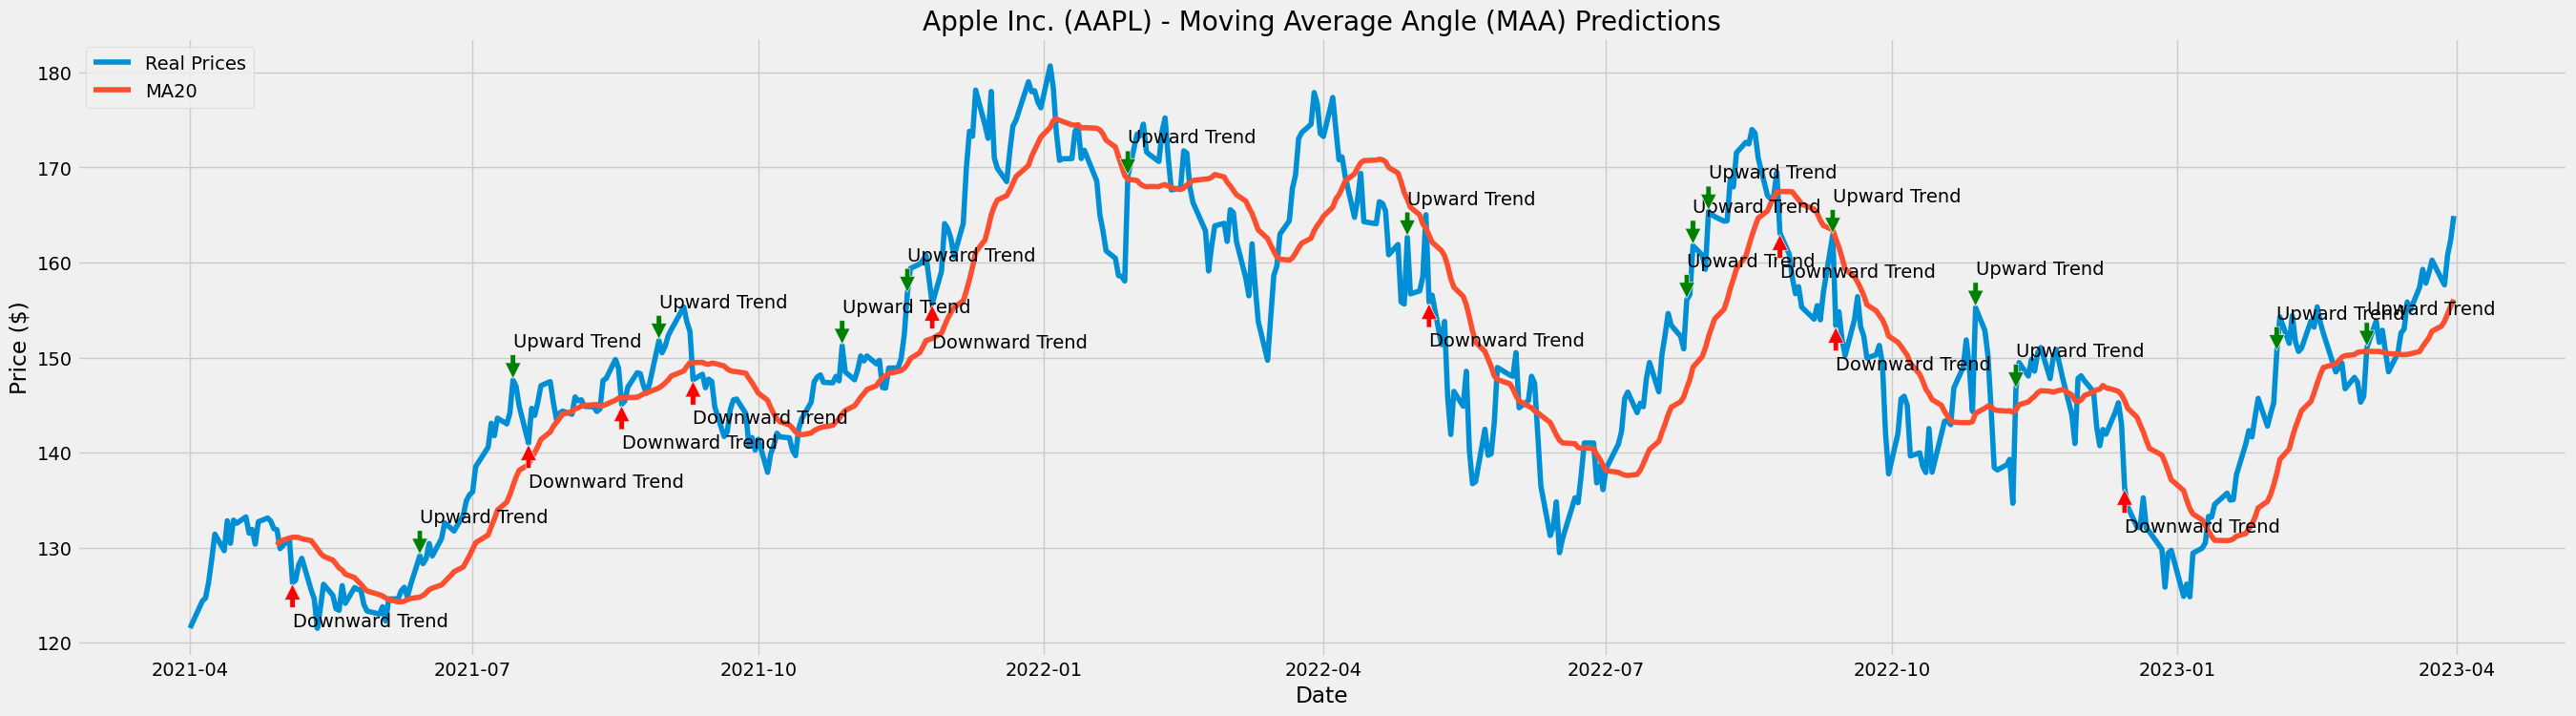

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(aapl['Adj Close'])
plt.plot(aapl['MA20'])
plt.title('Apple Inc. (AAPL) - Moving Average Angle (MAA) Predictions')
plt.ylabel('Price ($)')
plt.xlabel('Date')
plt.legend(['Real Prices', 'MA20'], loc='upper left')
for i in range(len(aapl)):
    if aapl['Trend'].iloc[i] == 1:
        plt.annotate('Upward Trend', xy=(aapl.index[i], aapl['Adj Close'].iloc[i]), xytext=(aapl.index[i], aapl['Adj Close'].iloc[i]+5),
            arrowprops=dict(facecolor='green', shrink=0.05), horizontalalignment='left', verticalalignment='top')
    elif aapl['Trend'].iloc[i] == -1:
        plt.annotate('Downward Trend', xy=(aapl.index[i], aapl['Adj Close'].iloc[i]), xytext=(aapl.index[i], aapl['Adj Close'].iloc[i]-5),
            arrowprops=dict(facecolor='red', shrink=0.05), horizontalalignment='left', verticalalignment='bottom')
plt.show()

#13- Moving Average Crossover (MAC)

Moving Average Crossover (MAC) is a technical analysis indicator used to identify potential buy and sell signals based on the intersection of two moving averages of different time periods. It is one of the most commonly used technical indicators in trading.

The MAC indicator involves plotting two moving averages on a chart: a faster moving average (short-term) and a slower moving average (long-term). When the faster moving average crosses above the slower moving average, it is considered a bullish signal, indicating that the stock price may be trending higher. Conversely, when the faster moving average crosses below the slower moving average, it is considered a bearish signal, indicating that the stock price may be trending lower.

The most commonly used moving averages for the MAC indicator are the 50-day and 200-day moving averages. However, traders can use any combination of moving averages that they prefer.

Traders use the MAC indicator to identify potential buy and sell signals based on the intersection of the two moving averages. When the faster moving average crosses above the slower moving average, it is considered a potential buy signal, indicating that the stock price may be trending higher. Conversely, when the faster moving average crosses below the slower moving average, it is considered a potential sell signal, indicating that the stock price may be trending lower.

Overall, the Moving Average Crossover indicator is a useful tool for traders who are looking to identify potential buy and sell signals based on the intersection of two moving averages. However, like any technical indicator, it should not be used in isolation and should be used in conjunction with other technical analysis tools and trading strategies to confirm signals and improve overall trading decisions.

In [ ]:
aapl['MA5'] = aapl['Adj Close'].rolling(window=5).mean()
aapl['MA20'] = aapl['Adj Close'].rolling(window=20).mean()
aapl['MAC'] = np.where(aapl['MA20'] > aapl['MA5'], 1, -1)

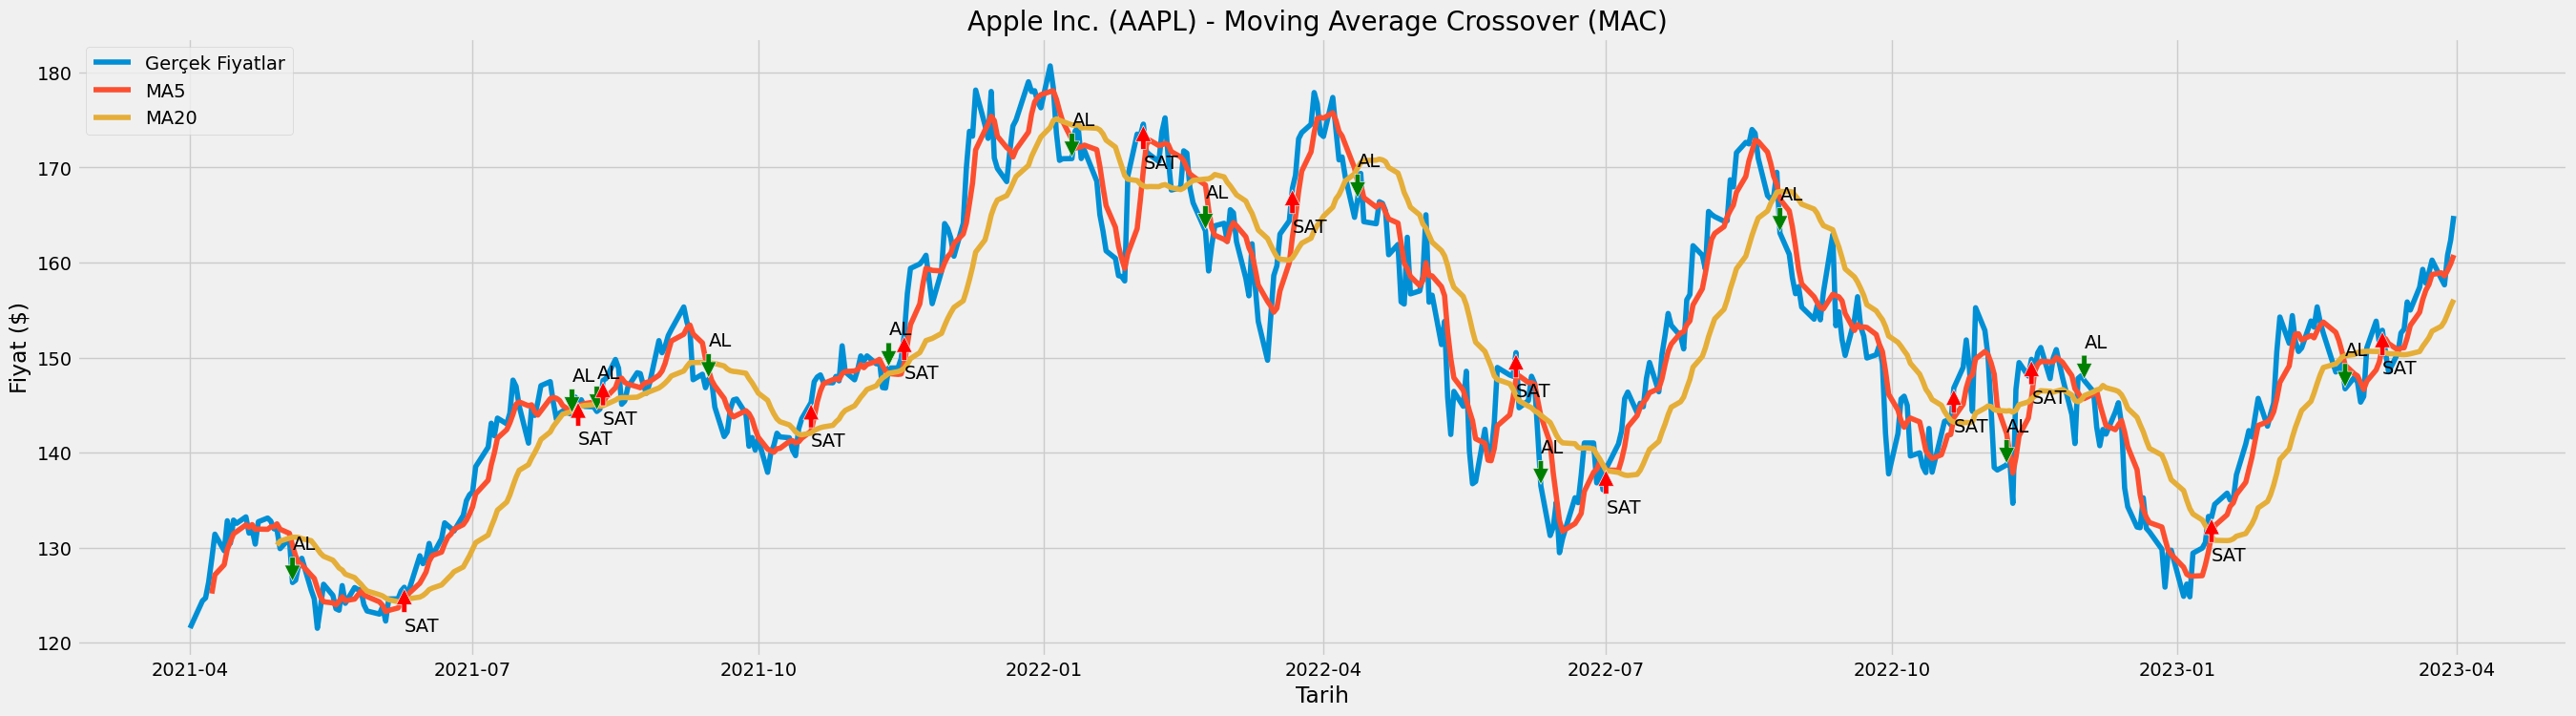

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(aapl['Adj Close'])
plt.plot(aapl['MA5'])
plt.plot(aapl['MA20'])
plt.title('Apple Inc. (AAPL) - Moving Average Crossover (MAC) ')
plt.ylabel('Fiyat ($)')
plt.xlabel('Tarih')
plt.legend(['Gerçek Fiyatlar', 'MA5', 'MA20'], loc='upper left')
for i in range(len(aapl)):
    if aapl['MAC'].iloc[i] == 1 and aapl['MAC'].iloc[i-1] == -1:
        plt.annotate('AL', xy=(aapl.index[i], aapl['Adj Close'].iloc[i]), xytext=(aapl.index[i], aapl['Adj Close'].iloc[i]+5),
            arrowprops=dict(facecolor='green', shrink=0.05), horizontalalignment='left', verticalalignment='top')
    elif aapl['MAC'].iloc[i] == -1 and aapl['MAC'].iloc[i-1] == 1:
        plt.annotate('SAT', xy=(aapl.index[i], aapl['Adj Close'].iloc[i]), xytext=(aapl.index[i], aapl['Adj Close'].iloc[i]-5),
            arrowprops=dict(facecolor='red', shrink=0.05), horizontalalignment='left', verticalalignment='bottom')        
plt.show()

#14- Double Exponential Moving Average (DEMA)

Double Exponential Moving Average (DEMA) is a technical analysis indicator that is designed to reduce the lag time of traditional moving averages. It is calculated by applying a double smoothing process to the price data, resulting in a faster and more responsive moving average.

The DEMA indicator is calculated using two exponential moving averages (EMAs), with one EMA being used to smooth the price data, and the other EMA being used to smooth the first EMA. The formula for calculating DEMA is:

DEMA = 2 * EMA(n) - EMA(EMA(n))

where n is the number of periods used for the moving average.

The DEMA indicator can be used in a similar way to other moving averages, such as the simple moving average (SMA) or exponential moving average (EMA), to identify trends and potential buy and sell signals. When the price is above the DEMA line, it is considered bullish, and when the price is below the DEMA line, it is considered bearish.

One advantage of using the DEMA indicator is that it is less prone to whipsaws, which are false signals that can occur when using other moving averages. This is because the DEMA is more responsive to changes in price trends due to the double smoothing process.

Overall, the Double Exponential Moving Average indicator is a useful tool for traders who are looking to reduce the lag time of traditional moving averages and generate more accurate signals. However, like any technical indicator, it should not be used in isolation and should be used in conjunction with other technical analysis tools and trading strategies to confirm signals and improve overall trading decisions.

In [ ]:
ema26 = aapl['Adj Close'].ewm(span=26, adjust=False).mean()
dema26 = 2 * ema26 - ema26.ewm(span=26, adjust=False).mean()
ema12 = aapl['Adj Close'].ewm(span=12, adjust=False).mean()
dema12 = 2 * ema12 - ema12.ewm(span=12, adjust=False).mean()
aapl['DEMA_Signal'] = np.where(dema12 > dema26, 1, -1)

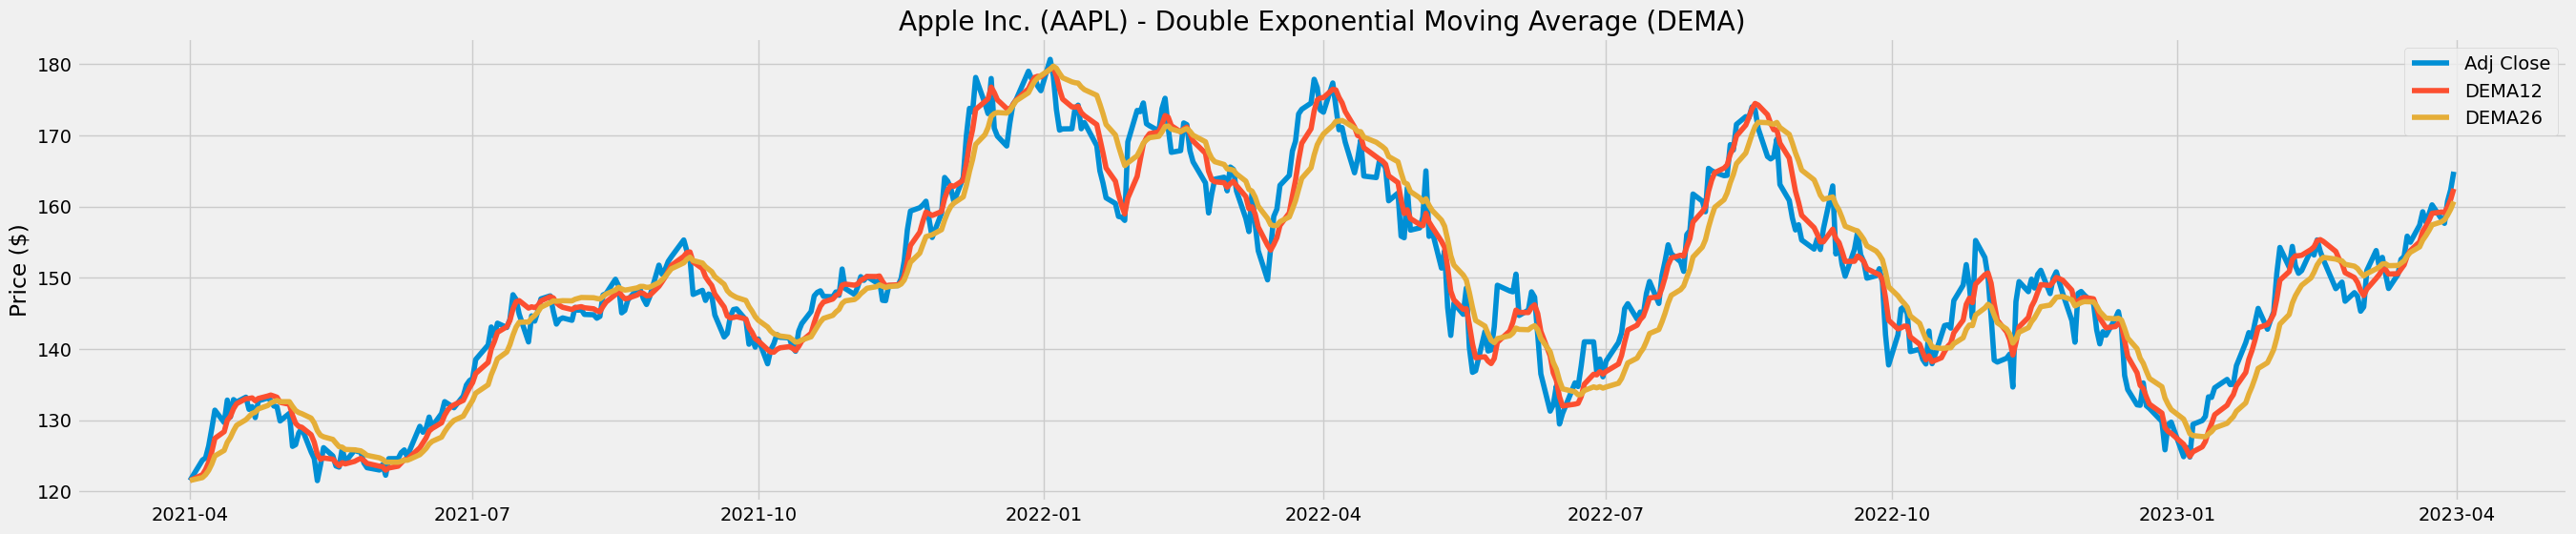

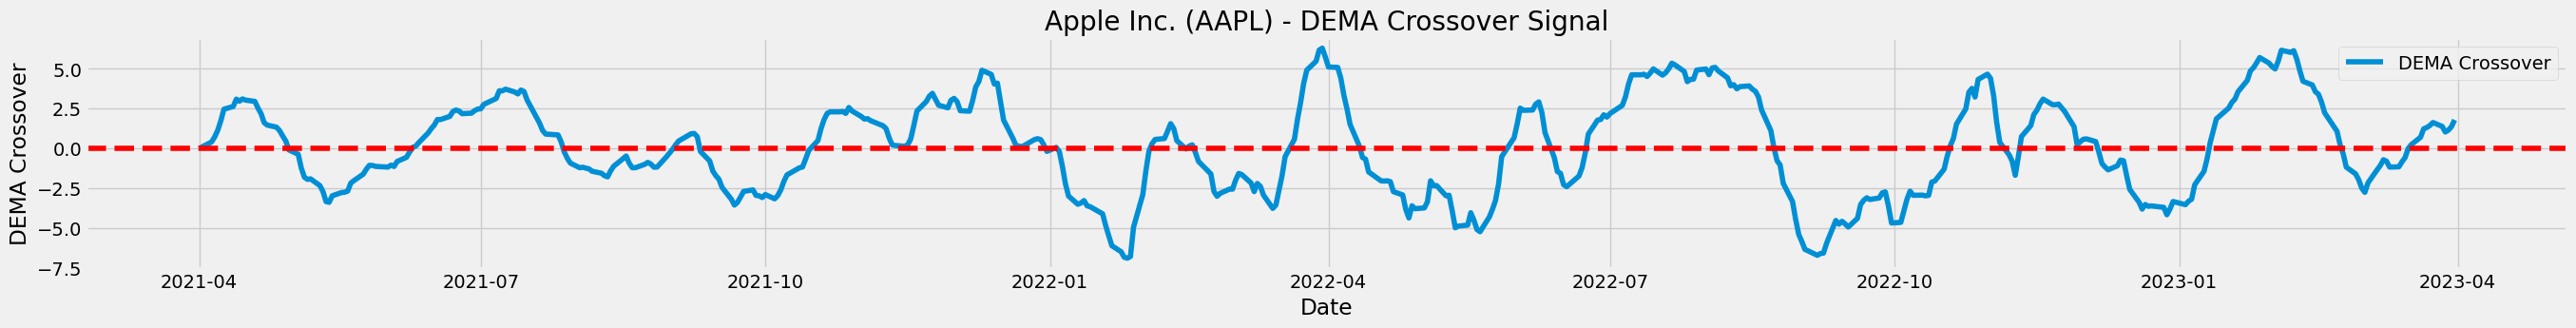

In [ ]:
fig, ax1 = plt.subplots(figsize=(30,6))
fig, ax2= plt.subplots(figsize=(30,3))

ax1.plot(aapl.index, aapl['Adj Close'], label='Adj Close')
ax1.plot(aapl.index, dema12, label='DEMA12')
ax1.plot(aapl.index, dema26, label='DEMA26')
ax1.set_title('Apple Inc. (AAPL) - Double Exponential Moving Average (DEMA)')
ax1.set_ylabel('Price ($)')
ax1.legend()

ax2.plot(aapl.index, dema12 - dema26, label='DEMA Crossover')
ax2.axhline(y=0, color='red', linestyle='--')
ax2.set_title('Apple Inc. (AAPL) - DEMA Crossover Signal')
ax2.set_xlabel('Date')
ax2.set_ylabel('DEMA Crossover')
ax2.legend()
plt.show()


#15- Smoothed Moving Average (SMMA)

Smoothed Moving Average (SMMA) is a technical analysis indicator used to identify trends and potential buy and sell signals in financial markets. It is similar to other types of moving averages, but it places a greater emphasis on recent price data by using a smoothing technique.

The SMMA is calculated by taking the average of a specified number of previous closing prices and then smoothing this average using a specified smoothing factor. The smoothing factor is used to reduce the impact of noise in the price data and give greater weight to more recent data points.

The formula for calculating the SMMA is as follows:

SMMA = (SMMA(previous) * (n-1) + close) / n

Where:

      SMMA(previous) is the previous value of the SMMA
      n is the number of periods used for the moving average
      close is the current closing price


The SMMA indicator can be used in a similar way to other moving averages to identify trends and potential buy and sell signals. When the price is above the SMMA line, it is considered bullish, and when the price is below the SMMA line, it is considered bearish.

One advantage of using the SMMA indicator is that it is less prone to whipsaws, which are false signals that can occur when using other moving averages. This is because the SMMA places a greater emphasis on recent price data and reduces the impact of noise in the price data.

Overall, the Smoothed Moving Average indicator is a useful tool for traders who are looking to identify trends and potential buy and sell signals in financial markets. However, like any technical indicator, it should not be used in isolation and should be used in conjunction with other technical analysis tools and trading strategies to confirm signals and improve overall trading decisions.

In [ ]:
n = 10
smma = pd.DataFrame()
smma['Close'] = aapl['Adj Close']
smma['prev_smma'] = smma['Close'].rolling(window=n).mean().shift()
smma['prev_close'] = smma['Close'].shift()
smma['smma'] = (smma['prev_smma'] * (n-1) + smma['Close']) / n
smma.dropna(inplace=True)



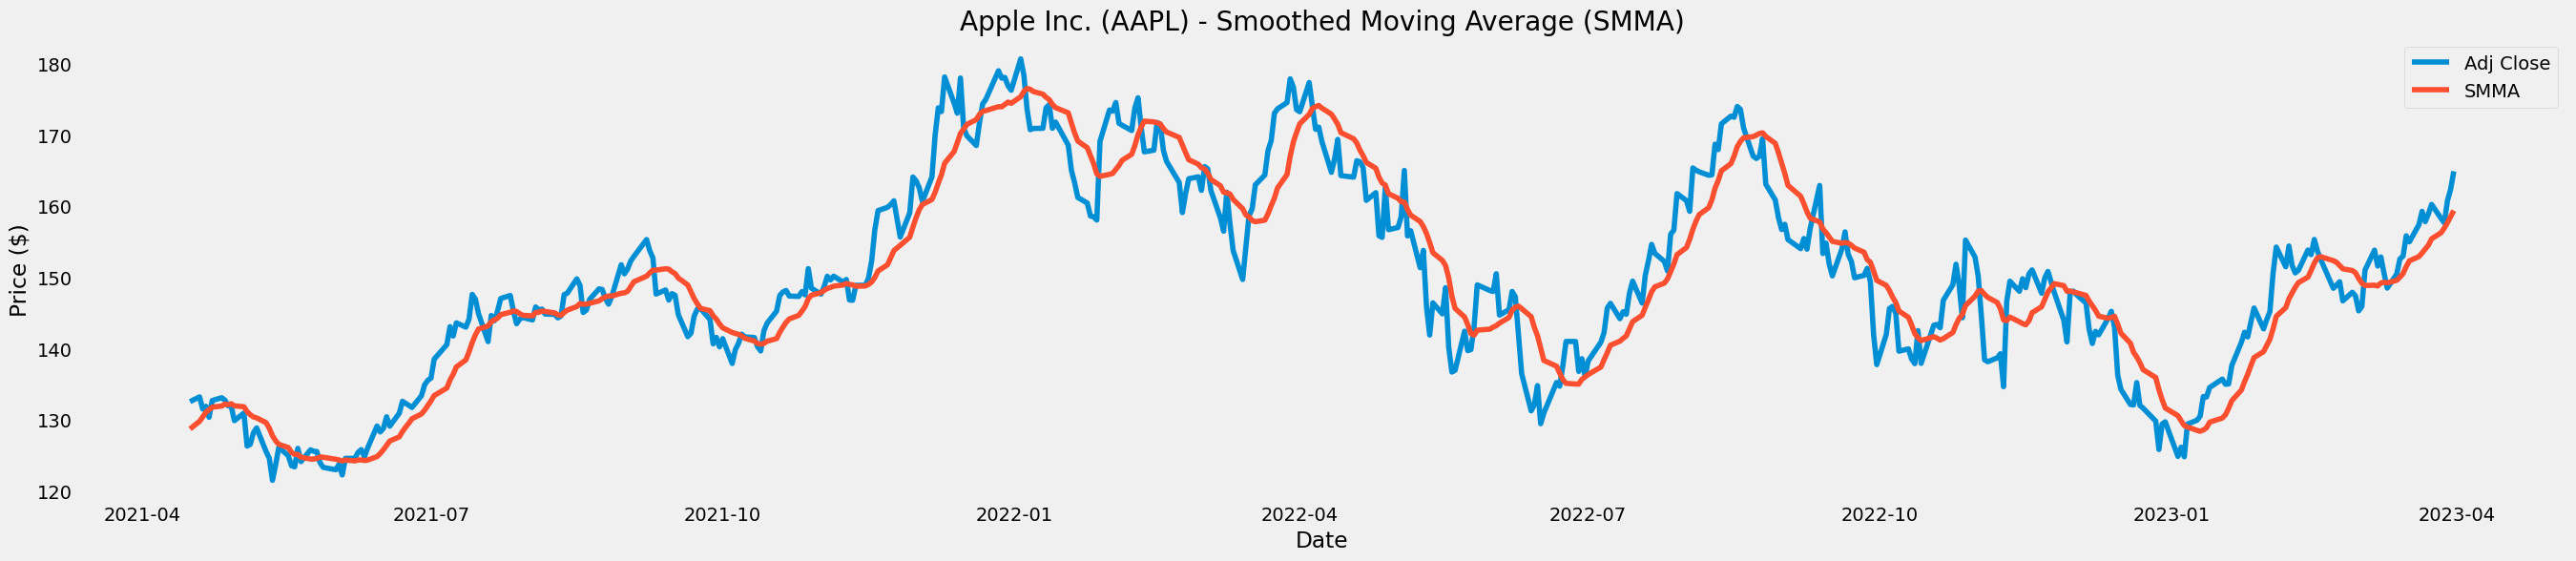

In [ ]:
plt.figure(figsize=(30,6))
plt.plot(smma.index, smma['Close'], label='Adj Close')
plt.plot(smma.index, smma['smma'], label='SMMA')
plt.title('Apple Inc. (AAPL) - Smoothed Moving Average (SMMA)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid()

plt.show()


In [ ]:
def smma(data, period):
    multiplier = 2 / (period + 1)
    smma = [np.nan] * (period - 1)
    smma.append(data[:period].mean())
    for i in range(period, len(data)):
        smma.append((data[i] - smma[i-1]) * multiplier + smma[i-1])
    return smma

aapl['SMMA12'] = smma(aapl['Adj Close'], 12)
aapl['SMMA26'] = smma(aapl['Adj Close'], 26)

aapl['Signal'] = np.zeros(len(aapl))
period = 9
aapl['SMMA12-26'] = aapl['SMMA12'] - aapl['SMMA26']
aapl['Signal'][period:] = np.where(aapl['SMMA12-26'][period:] > 0, 1.0, 0.0)
aapl['Position'] = aapl['Signal'].diff()

<ipython-input-332-fc3a01948601>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl['Signal'][period:] = np.where(aapl['SMMA12-26'][period:] > 0, 1.0, 0.0)


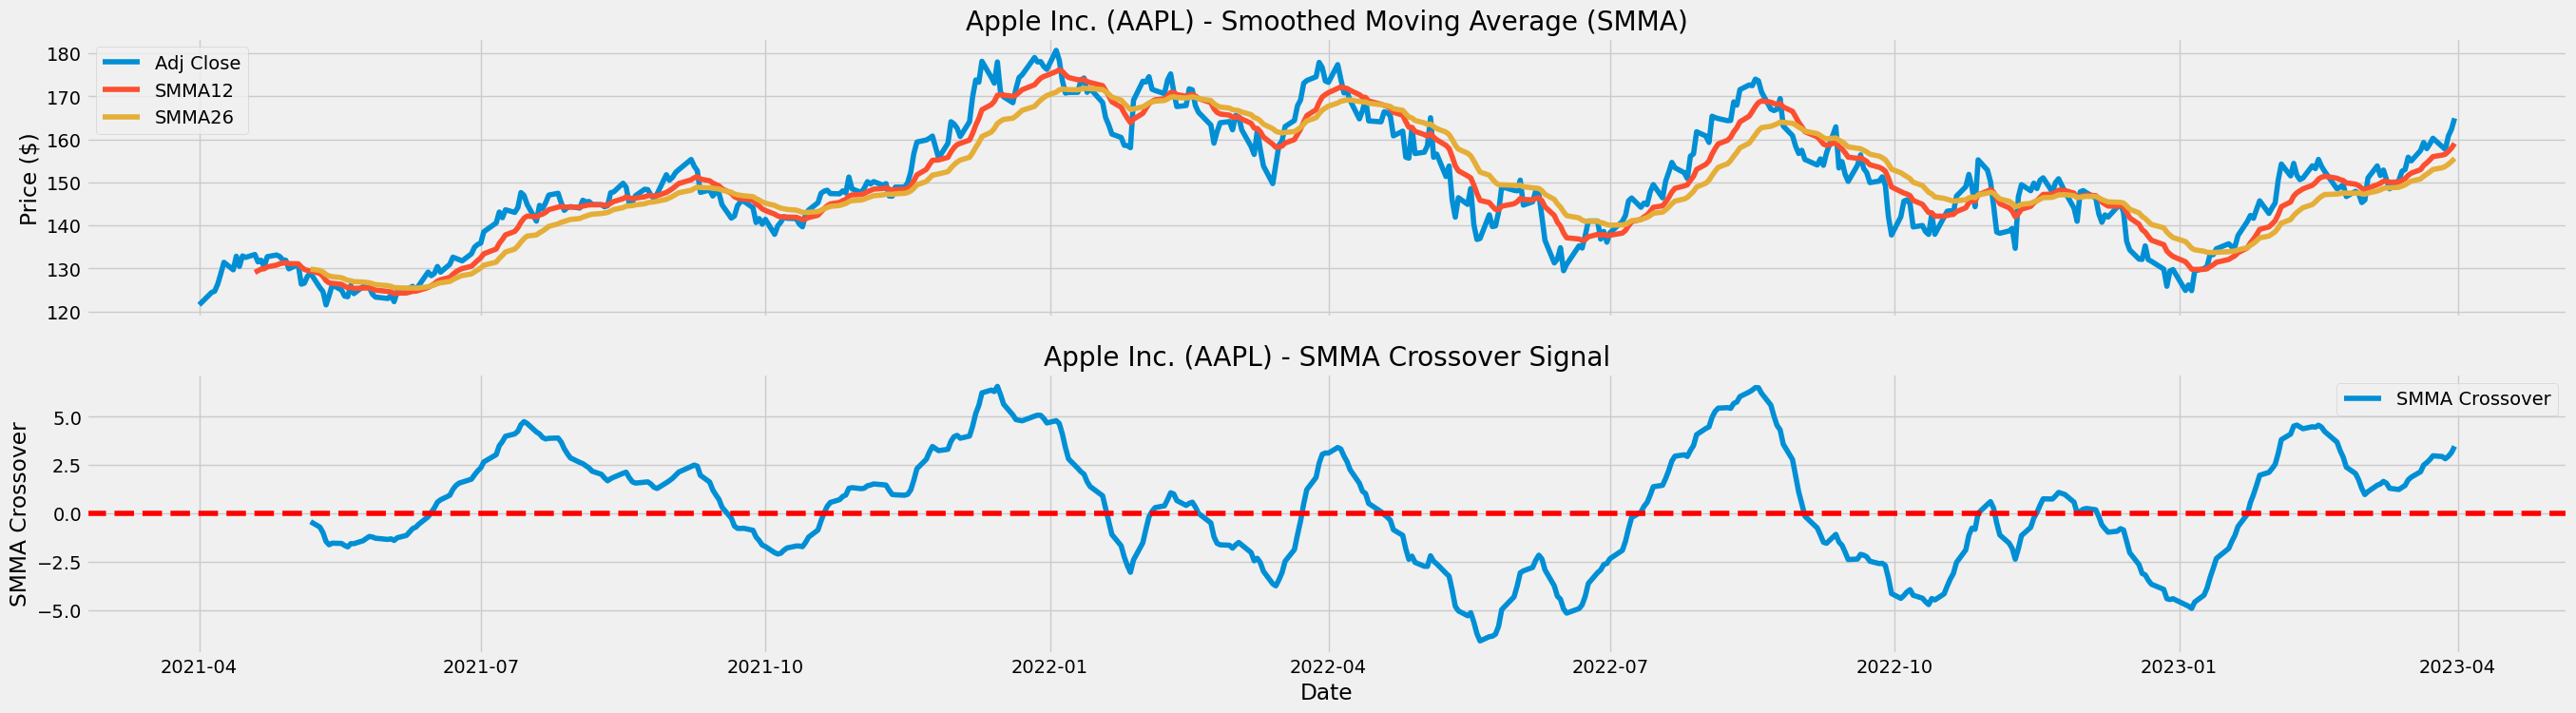

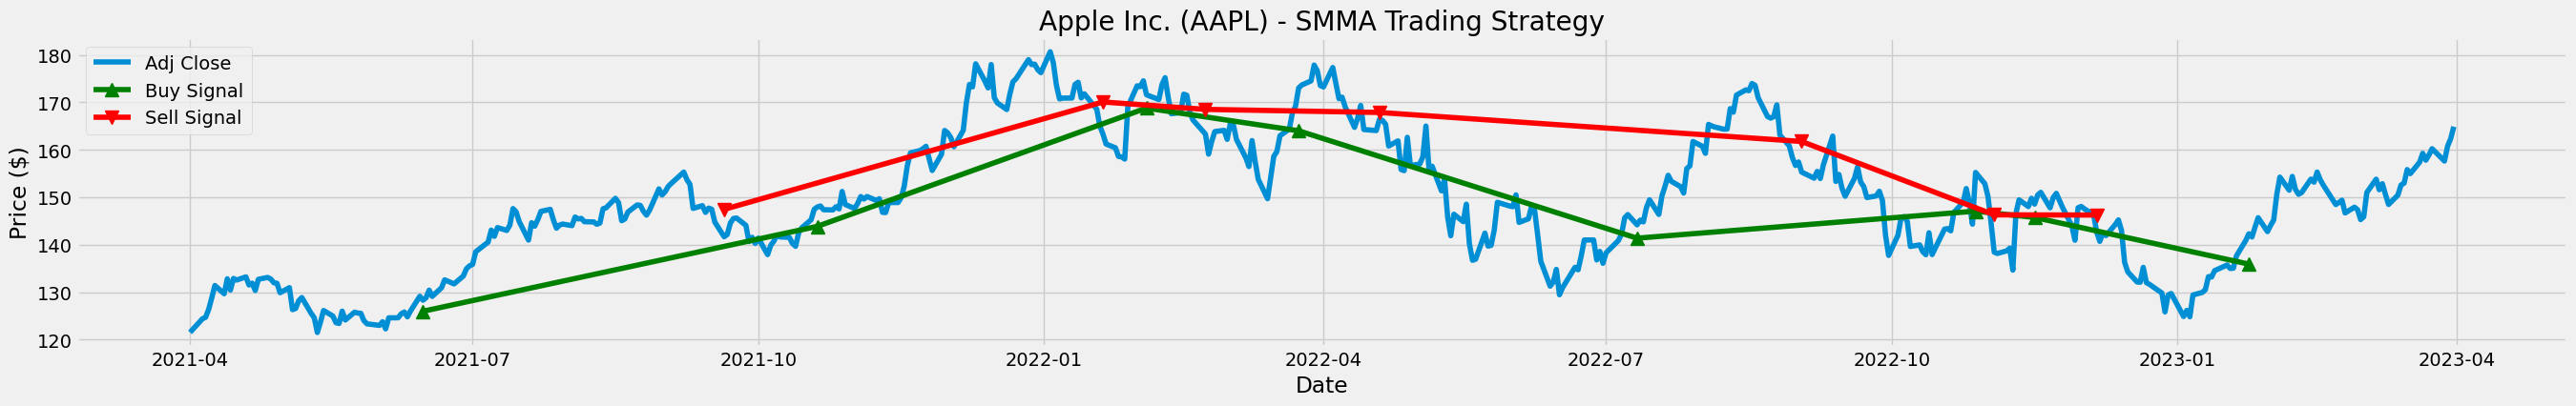

In [ ]:
fig, ax = plt.subplots(2, sharex=True, figsize=(30,8))
ax[0].plot(aapl.index, aapl['Adj Close'], label='Adj Close')
ax[0].plot(aapl.index, aapl['SMMA12'], label='SMMA12')
ax[0].plot(aapl.index, aapl['SMMA26'], label='SMMA26')
ax[0].set_title('Apple Inc. (AAPL) - Smoothed Moving Average (SMMA)')
ax[0].set_ylabel('Price ($)')
ax[0].legend()
ax[1].plot(aapl.index, aapl['SMMA12-26'], label='SMMA Crossover')
ax[1].axhline(y=0, color='red', linestyle='--')
ax[1].set_title('Apple Inc. (AAPL) - SMMA Crossover Signal')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('SMMA Crossover')
ax[1].legend()
plt.show()

fig, ax = plt.subplots(figsize=(30,4))
ax.plot(aapl.index, aapl['Adj Close'], label='Adj Close')
ax.plot(aapl.loc[aapl['Position'] == 1].index, aapl['SMMA12'][aapl['Position'] == 1], 
        marker='^', markersize=10, color='green', label='Buy Signal')
ax.plot(aapl.loc[aapl['Position'] == -1].index, aapl['SMMA12'][aapl['Position'] == -1], 
        marker='v', markersize=10, color='red', label='Sell Signal')
ax.set_title('Apple Inc. (AAPL) - SMMA Trading Strategy')
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.legend()
plt.show()

# 16-Zero Lag Moving Average (ZLMA)

Zero Lag Moving Average (ZLMA) is a technical analysis indicator that is designed to reduce the lag time of traditional moving averages. It is calculated by applying a smoothing process to the price data, resulting in a faster and more responsive moving average.

The ZLMA indicator is calculated using a series of weighted coefficients that are applied to the price data. These coefficients are designed to eliminate the lag time of the moving average, resulting in a more accurate and timely representation of price trends.

The formula for calculating ZLMA is:

ZLMA = EMA(EMA(close, n), m)

where:

    EMA stands for Exponential Moving Average
    close is the closing price of the asset being analyzed
    n is the number of periods used for the first EMA
    m is the number of periods used for the second EMA
The ZLMA indicator can be used in a similar way to other moving averages to identify trends and potential buy and sell signals. When the price is above the ZLMA line, it is considered bullish, and when the price is below the ZLMA line, it is considered bearish.

One advantage of using the ZLMA indicator is that it is less prone to whipsaws, which are false signals that can occur when using other moving averages. This is because the ZLMA is designed to eliminate lag time and provide more accurate and timely signals.

Overall, the Zero Lag Moving Average indicator is a useful tool for traders who are looking to reduce the lag time of traditional moving averages and generate more accurate signals. However, like any technical indicator, it should not be used in isolation and should be used in conjunction with other technical analysis tools and trading strategies to confirm signals and improve overall trading decisions.

In [ ]:
def zlma(close, period):
    lag = int((period - 1) / 2)
    weighted_close = 2 * close - close.rolling(period).mean()
    zlma = pd.Series((2 * weighted_close - weighted_close.rolling(lag + 1).mean()).rolling(lag + 1).mean(), name=f'ZLMA({period})')
    return zlma


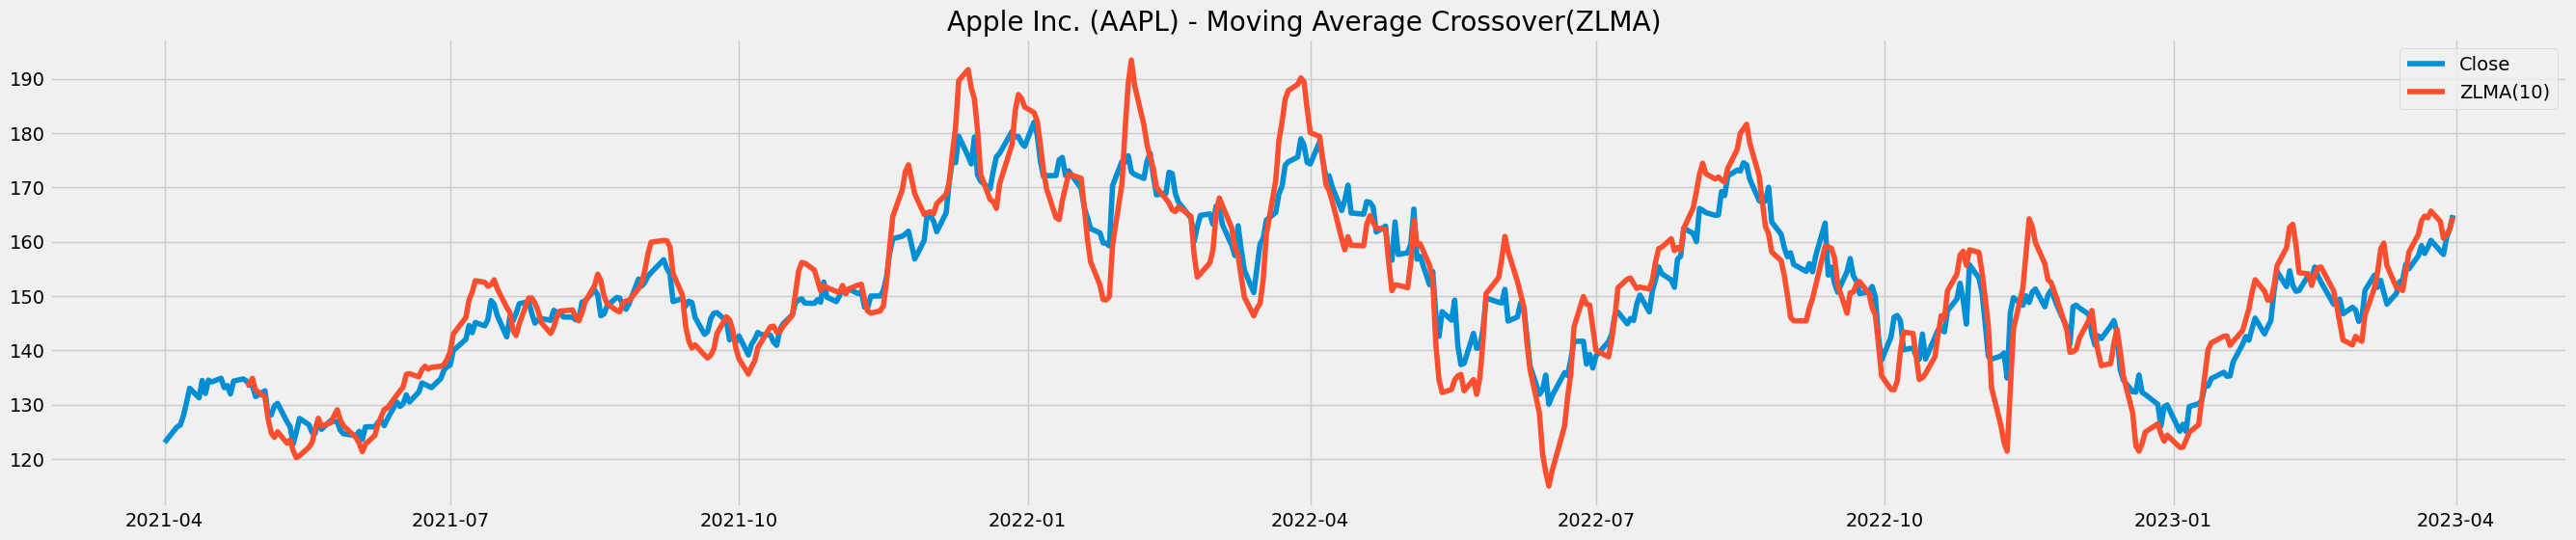

In [ ]:
zlma_10 = zlma(aapl['Close'], 10)

plt.figure(figsize=(30,6))
plt.plot(aapl['Close'], label='Close')
plt.plot(zlma_10, label='ZLMA(10)')
plt.title('Apple Inc. (AAPL) - Moving Average Crossover(ZLMA) ')

plt.legend()
plt.show()

#17- Super Smoother Moving Average (SSMA) 

The Super Smoother Moving Average (SSMA) is a technical analysis indicator that aims to filter out noise and provide a smoother and more accurate representation of price trends. It uses a unique formula to calculate the moving average, resulting in a more responsive and precise indicator.

The SSMA is calculated using a complex formula that involves a combination of weighted coefficients and polynomial functions. The formula is designed to filter out short-term fluctuations in the price data while still capturing long-term trends.

The formula for calculating the SSMA is as follows:

SSMA = 2 * EMA(EMA(close, n), m/2) - EMA(EMA(EMA(close, n), m/2), m)

where:

    EMA stands for Exponential Moving Average
    close is the closing price of the asset being analyzed
    n is the number of periods used for the first EMA
    m is the number of periods used for the second and third EMA
The SSMA indicator can be used in a similar way to other moving averages to identify trends and potential buy and sell signals. When the price is above the SSMA line, it is considered bullish, and when the price is below the SSMA line, it is considered bearish.

One advantage of using the SSMA indicator is that it is highly responsive to changes in price trends, while still filtering out noise and providing a smooth representation of the underlying trend. This can be particularly useful for traders who are looking to capture short-term price movements while still maintaining a long-term perspective.

Overall, the Super Smoother Moving Average indicator is a useful tool for traders who are looking for a more accurate and responsive representation of price trends. However, like any technical indicator, it should not be used in isolation and should be used in conjunction with other technical analysis tools and trading strategies to confirm signals and improve overall trading decisions

In [ ]:
data =aapl
n = 20 
alpha = 2 / (n + 1)
data['lag1'] = data['Adj Close'].shift(1)
data['lag2'] = data['Adj Close'].shift(2)
data['ssma'] = (4*data['lag1'] + 3*data['lag2'] + 2*data['Adj Close'] + (1-alpha)*data['Adj Close'].shift(3)) / 10



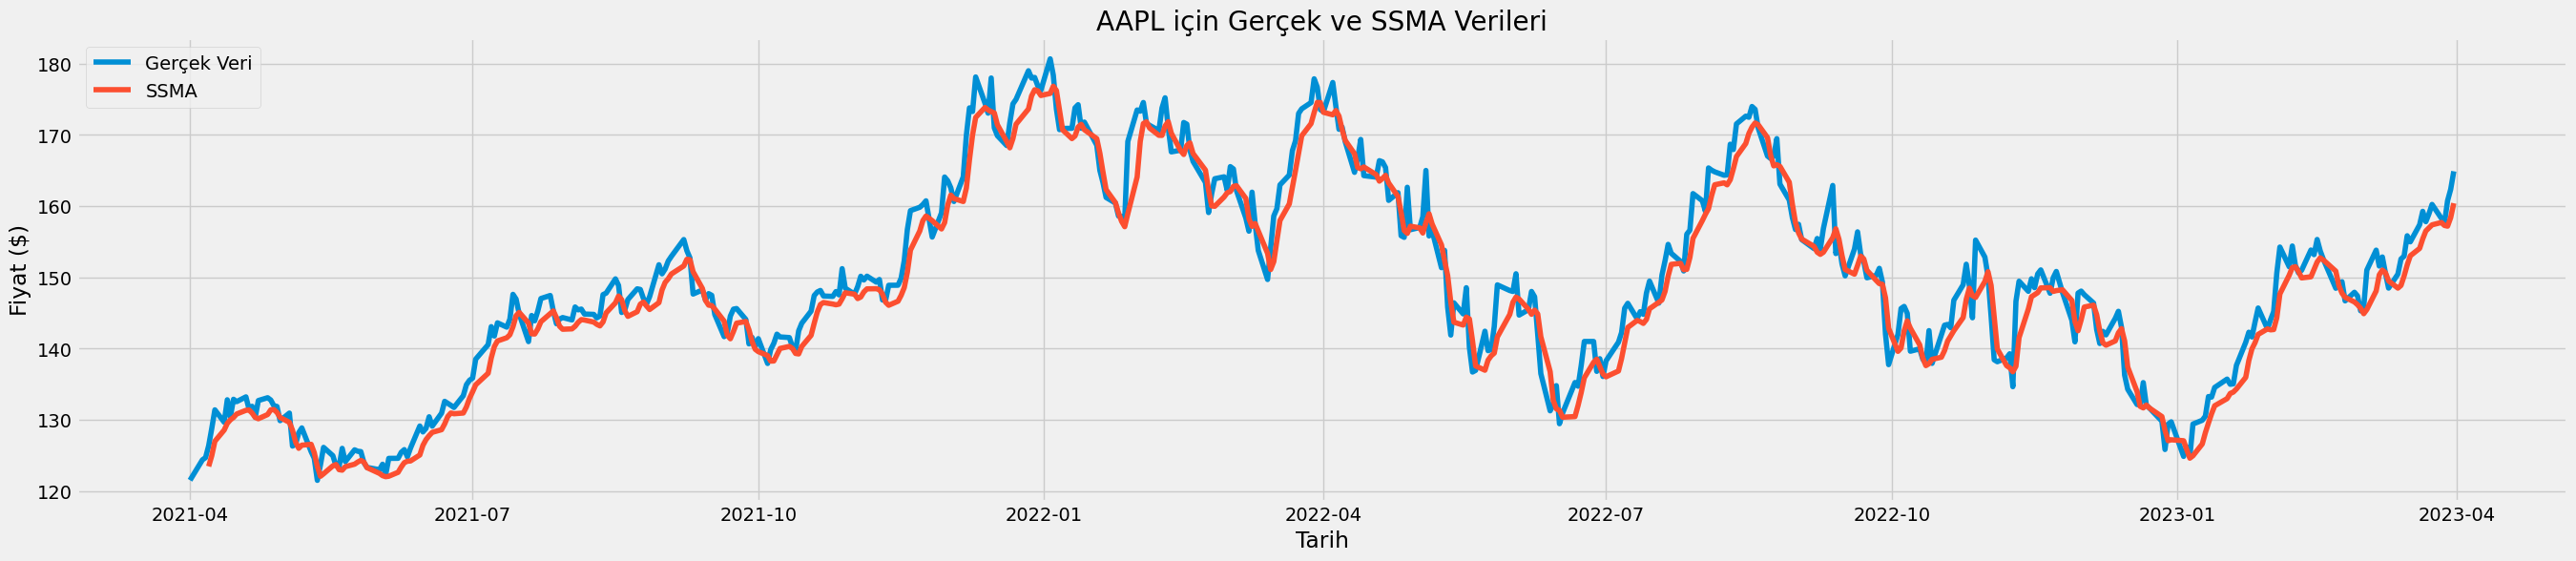

In [ ]:
fig, ax = plt.subplots(figsize=(30,6))
ax.plot(data.index, data['Adj Close'], label='Gerçek Veri')
ax.plot(data.index, data['ssma'], label='SSMA')
ax.legend(loc='upper left')
ax.set_xlabel('Tarih')
ax.set_ylabel('Fiyat ($)')
ax.set_title('AAPL için Gerçek ve SSMA Verileri')
plt.show()

#18- Double Smoothed Simple Moving Average (DSSMA)

Double Smoothed Simple Moving Average (DSSMA) is a technical analysis indicator that is similar to other moving averages in that it aims to identify trends and potential buy and sell signals. However, it uses a unique formula that involves double smoothing the price data, resulting in a smoother and more accurate representation of price trends.

The DSSMA indicator is calculated by taking the Simple Moving Average (SMA) of the previous n periods and then taking the SMA of that result over the next m periods. The resulting value is then smoothed again using a third SMA calculation over the next k periods. The formula for calculating DSSMA is:

DSSMA = SMA(SMA(SMA(close, n), m), k)

where:

SMA stands for Simple Moving Average
close is the closing price of the asset being analyzed
n is the number of periods used for the first SMA
m is the number of periods used for the second SMA
k is the number of periods used for the third SMA
The DSSMA indicator can be used in a similar way to other moving averages to identify trends and potential buy and sell signals. When the price is above the DSSMA line, it is considered bullish, and when the price is below the DSSMA line, it is considered bearish.

One advantage of using the DSSMA indicator is that it provides a smoother and more accurate representation of price trends, as the double smoothing process helps to filter out noise and short-term fluctuations in the price data. This can be particularly useful for traders who are looking to capture longer-term price movements while still maintaining a clear and accurate perspective.

Overall, the Double Smoothed Simple Moving Average indicator is a useful tool for traders who are looking for a smoother and more accurate representation of price trends. However, like any technical indicator, it should not be used in isolation and should be used in conjunction with other technical analysis tools and trading strategies to confirm signals and improve overall trading decisions.

In [ ]:
def dssma(prices, period):
    sma = prices.rolling(window=period).mean()
    dssma = sma.rolling(window=period).mean()
    return dssma

aapl['dssma_10'] = dssma(aapl['Adj Close'], 10)
aapl['dssma_20'] = dssma(aapl['Adj Close'], 20)

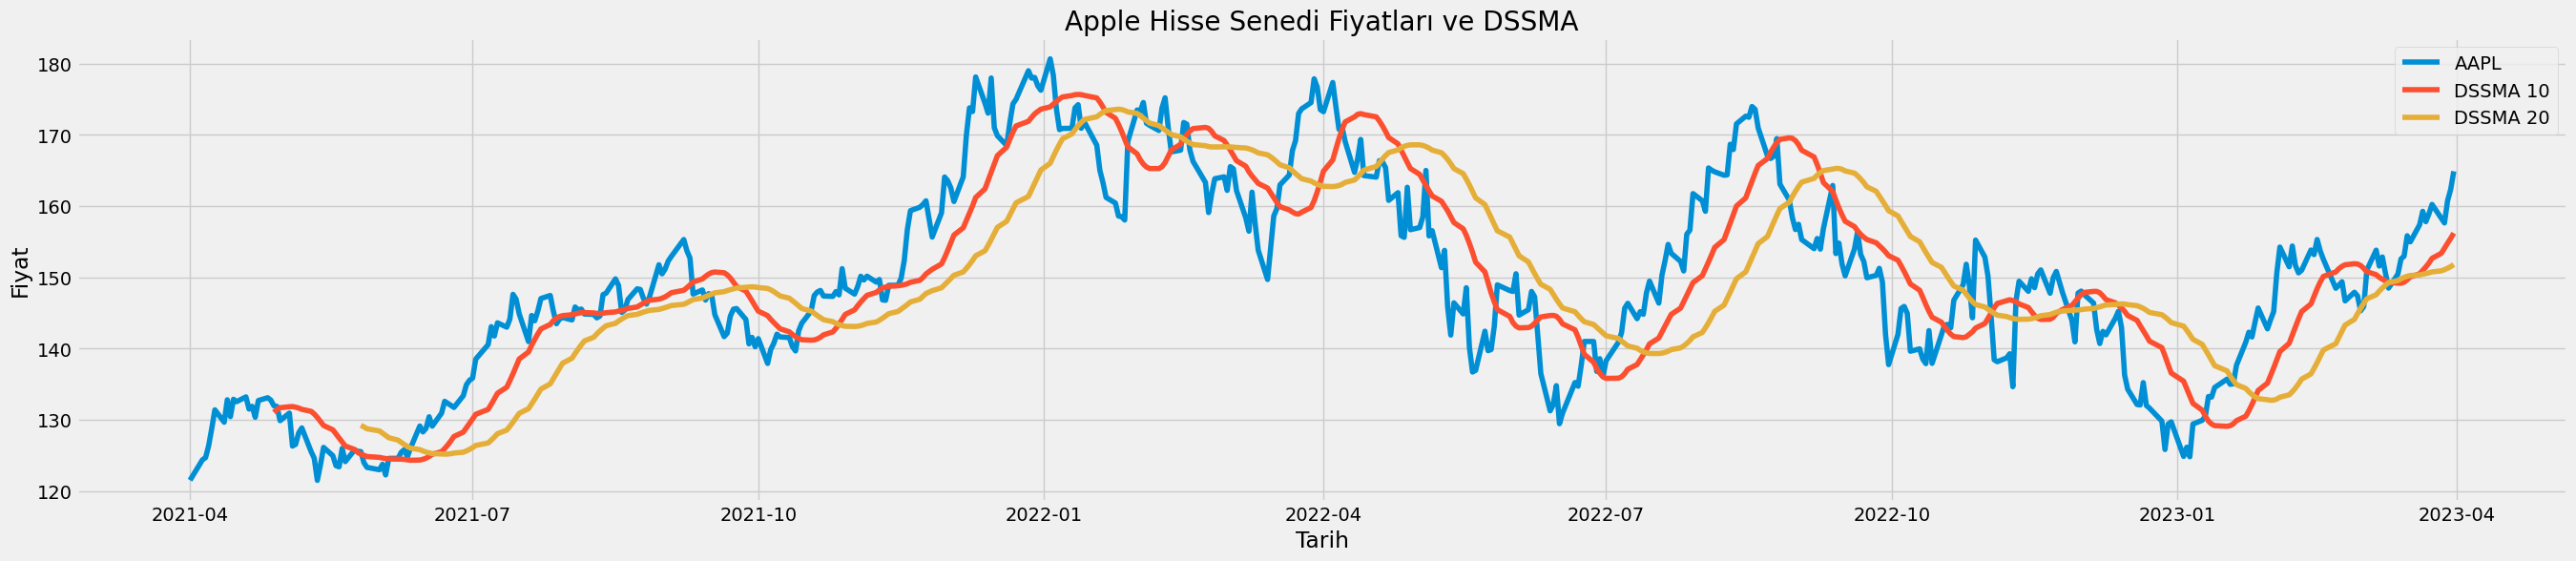

In [ ]:
fig, ax = plt.subplots(figsize=(30, 6))

ax.plot(aapl['Adj Close'], label='AAPL')
ax.plot(aapl['dssma_10'], label='DSSMA 10')
ax.plot(aapl['dssma_20'], label='DSSMA 20')
ax.legend()
ax.set_title('Apple Hisse Senedi Fiyatları ve DSSMA')
ax.set_xlabel('Tarih')
ax.set_ylabel('Fiyat')
plt.show()